# PDS A2
You will be shared ten files from coders who annotated verses from the 1st book of Iliad (no names shared). In each file there are the following columns: polarity (the sentiment the reader felt while reading the verse), emotions, hero (Homer narrating or a hero talking). The goal of this assignment is to build Machine Learning for automated sentiment annotation.Please load the IB24 file also from the start.

---

### 1. Exploring the data.
  * Address the missing values (and any outliers). 
  * Measure inter-annotator agreement in the *polarity* and *hero* columns.

---

I used the google collab for this assignment

In [98]:
# T1
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import pandas as pd
import numpy as np 
import os
import glob

from google.colab import files


uploaded = files.upload()

pd.set_option('display.max_rows', 12500)
filenames=[]
path = '/content'   ###Insert the path here
dirs = os.listdir( path )
os.chdir(path)
print(os.getcwd())

for file in dirs:
    filenames.append(file)
print(filenames)    

Saving 335201.xlsx to 335201 (5).xlsx
Saving 3150014.xlsx to 3150014 (5).xlsx
Saving 3252107.xlsx to 3252107 (5).xlsx
Saving 3252108.xlsx to 3252108 (5).xlsx
Saving 3252113.xlsx to 3252113 (5).xlsx
Saving 3352106.xlsx to 3352106 (5).xlsx
Saving 3352114.xlsx to 3352114 (5).xlsx
Saving 3352115.xlsx to 3352115 (5).xlsx
Saving 3352116.xlsx to 3352116 (5).xlsx
Saving 3352119.xlsx to 3352119 (5).xlsx
Saving I24.xlsx to I24 (4).xlsx
/content
['.config', '3352106.xlsx', '3352106 (1).xlsx', '3352119 (1).xlsx', '3252108 (1).xlsx', '3150014 (3).xlsx', '3352114 (5).xlsx', '3252107.xlsx', '3352114 (1).xlsx', '3252107 (4).xlsx', '3352115 (2).xlsx', '335201 (3).xlsx', '3352119 (4).xlsx', '3352119 (2).xlsx', '3352106 (2).xlsx', '3150014 (4).xlsx', '3150014 (2).xlsx', '3352116 (4).xlsx', '3252107 (3).xlsx', '3150014 (5).xlsx', '3352115.xlsx', '3352114 (4).xlsx', '3352115 (4).xlsx', 'I24 (4).xlsx', '3252113 (5).xlsx', 'vocab.txt', '3352114.xlsx', '3150014 (1).xlsx', 'IB24.f3352115.csv.gz', '3252108 (3).

Read every file that starts with a number

In [99]:
filenames=[w for w in filenames if (w.split('.')[0]).isnumeric()]

In [100]:
filenames

['3352106.xlsx',
 '3252107.xlsx',
 '3352115.xlsx',
 '3352114.xlsx',
 '3252108.xlsx',
 '3150014.xlsx',
 '3352116.xlsx',
 '335201.xlsx',
 '3352119.xlsx',
 '3252113.xlsx']

In [101]:
coders=pd.DataFrame({'A' : []})    ### initialize dataframe


In [102]:
for file in filenames:                               #  stack the columns find len of each annotator
    coders=pd.concat([coders,pd.read_excel(file)])

Replace with no emotion the nan's

In [103]:
coders.loc[:,'polarity']=coders.loc[:,'polarity'].replace([np.nan],["no emotion"])
coders.hero.fillna(coders.iloc[:,5],inplace=True)

I made a list of the id's but its a list of lists,so i created a flatten method to make the list of lists a single list.

In [104]:
ID_list=[]
for i in range(len(filenames)):
    ID_list.append([filenames[i][0:7]]*589)
    
def flatten(t):
    return [item for sublist in t for item in sublist]
ID_list=flatten(ID_list)
print(len(ID_list))
coders['A']=ID_list 

5890


In [105]:
coders=coders.set_index(['A',coders.index ])      #######       set the multindex
coders=coders.sort_index()  

In [106]:
coders=coders.iloc[:,:4]

Save the annotator names to a list 

In [107]:
temp_ID=[]
for i in range(len(filenames)):
    temp_ID.append(filenames[i][0:7])
print(temp_ID)    

['3352106', '3252107', '3352115', '3352114', '3252108', '3150014', '3352116', '335201.', '3352119', '3252113']


Find percentage agreement as follows

In [108]:
c=[]

for IDD in temp_ID:
    for Id in temp_ID:
        if Id<IDD:
            
            b=coders.loc[(Id),"polarity"]==coders.loc[(IDD),"polarity"]
            c.append(b.mean())
            
print("For polarity the percentage agreement is: ",mean(c)*100 )           
            


For polarity the percentage agreement is:  42.34672703263535


In [109]:
c=[]

for IDD in temp_ID:
    for Id in temp_ID:
        if Id<IDD:
            
            b=coders.loc[(Id),"hero"]==coders.loc[(IDD),"hero"]
            c.append(b.mean())
            
print("For hero the percentage agreement is: ",mean(c)*100 )           
            


For hero the percentage agreement is:  54.19354838709678


### 2. Data preprocessing.
  * Map the `polarity` (positive, negative, no emotion) to scores (respectively: 1, -1, 0). 
  * Perform a data exploratory analysis for `polarity` by visualising the class balance per annotator, and the variance per verse and per annotator. Combine `polarity` with `emotions` and `hero` to explore the data further (for example, one could study the aggregated sentiment-score per hero/narrator or the emotion distribution across the sentiment scores). Note that all figures should comply with the ten rules of visualisation that were taught in class. 
  * Suggest three findings (max: 50 words each) that will be based on the visualisations of your exploratory analysis.

---

Replace NAN's for hero and emotion and polarity= 1 or 0 or -1

In [110]:
# T2
coders.iloc[:,2].fillna("little emotion",inplace=True)
coders.iloc[:,3].fillna("Homer",inplace=True)
coders.iloc[:,1]=coders.iloc[:,1].replace(["positive","negative", "no emotion","out of scope"], [1, -1, 0,0])

Observe the frequency of each value

In [111]:
print(coders["polarity"].value_counts())
print(coders["hero"].value_counts())
print(coders["emotions"].value_counts())

-1    2328
 1    2110
 0    1452
Name: polarity, dtype: int64
Homer         1671
Achilleus     1631
Agamemnon      693
Thetis         338
Nestor         298
Zeus           276
Hephaestus     213
Hera           142
Apollo         112
Athena         100
Odysseus        93
Muse            71
Chryses         51
Calchas         40
Kalchas         36
Kalhas          36
Patroclus       32
Chrysis         17
Phobos          12
Hrisis           7
Menelaus         7
Briseis          5
Andromache       4
Iris             2
CHRISIS          2
Antenor          1
Name: hero, dtype: int64
little emotion     1297
anger               393
admiration          358
distress            244
joy                 236
suspense            232
sadness             202
awe                 182
hope                181
acknowledgement     176
fear                172
respect             160
worry               138
shame               125
pain                122
pride               121
relief              116
satisfactio

Create Balance_plot dataframe that helped me with the plots on seaborn

In [112]:
coders.rename_axis(("Annotator","verse_ID"),inplace=True)
Balance_plot= coders
Balance_plot=Balance_plot.reset_index()

In [113]:
Balance_plot.head(10)

,Annotator,verse_ID,verse,polarity,emotions,hero
0,3150014,0,"Τη μάνητα, θεά, τραγούδα μας του ξακουστού Αχι...",1,admiration,Homer
1,3150014,1,"ανάθεμα τη, πίκρες που 'δωκε στους Αχαιούς περ...",-1,pain,Homer
2,3150014,2,και πλήθος αντρειωμένες έστειλε ψυχές στον Άδη...,-1,awe,Homer
3,3150014,3,"παλικαριών, στους σκύλους ρίχνοντας να φάνε τα...",-1,fear,Homer
4,3150014,4,και στα όρνια ολούθε —έτσι το θέλησε να γίνει ...,0,acknowledgement,Homer
5,3150014,5,απ᾿ τη στιγμή που πρωτοπιάστηκαν και χώρισαν ο...,0,suspense,Homer
6,3150014,6,του Ατρέα ο γιος ο στρατοκράτορας κι ο μέγας Α...,1,suspense,Homer
7,3150014,7,"Του Δία και της Λητώς τους έσπρωξεν ο γιος, πο...",0,suspense,Homer
8,3150014,8,χολιάζοντας κακιά εξεσήκωσεν αρρώστια και πέθα...,-1,sadness,Homer
9,3150014,9,στρατός πολύς᾿ τι δε σεβάστηκεν ο γιος του Ατρ...,0,suspense,Homer


Frequency of polarities for each annotator to observe the variance and mean per annotator

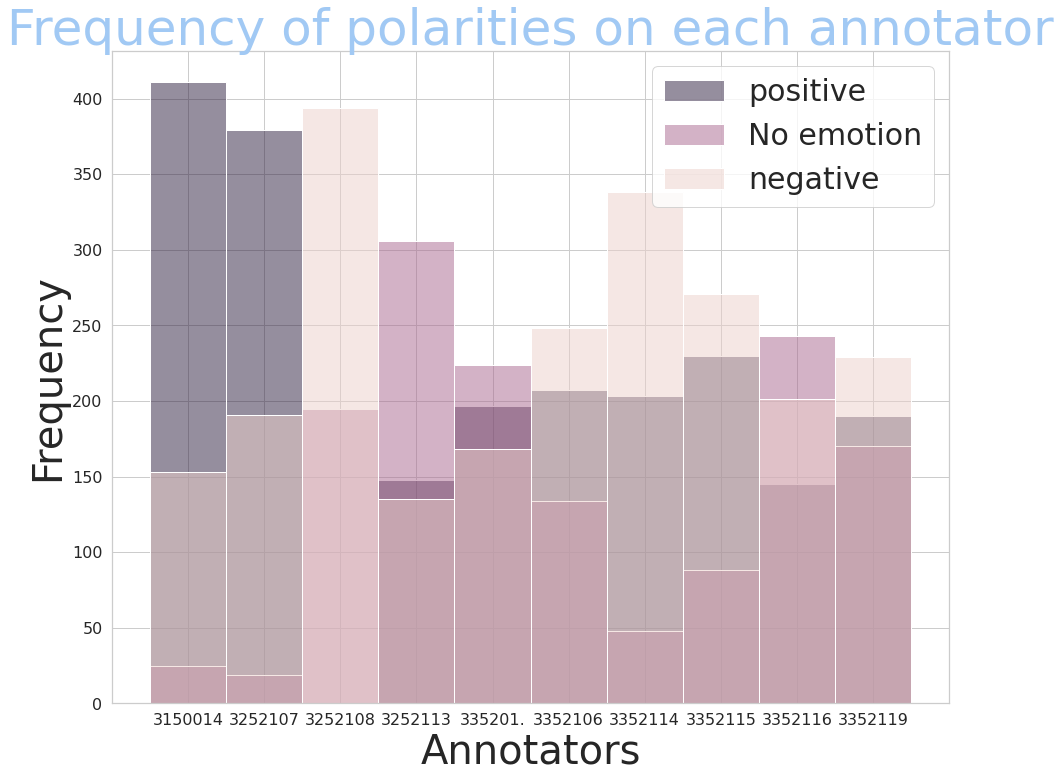

In [114]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 12))
sns.set_color_codes("pastel")
a=sns.histplot(x="Annotator",hue="polarity", data=Balance_plot,label="Total",
             color="b")
a.set_xlabel("Annotators",fontsize=40)
a.tick_params(labelsize=16)
a.axes.set_title("Frequency of polarities on each annotator",fontsize=50,c="b")
a.set_ylabel("Frequency",fontsize=40)

a.legend(["positive","No emotion","negative"],fontsize=30)
plt.show()

As the plot show the variability is quite big with most annotators having negative feelings,some have strongly good and a couple of them no emotion.

The same logic for each verse:

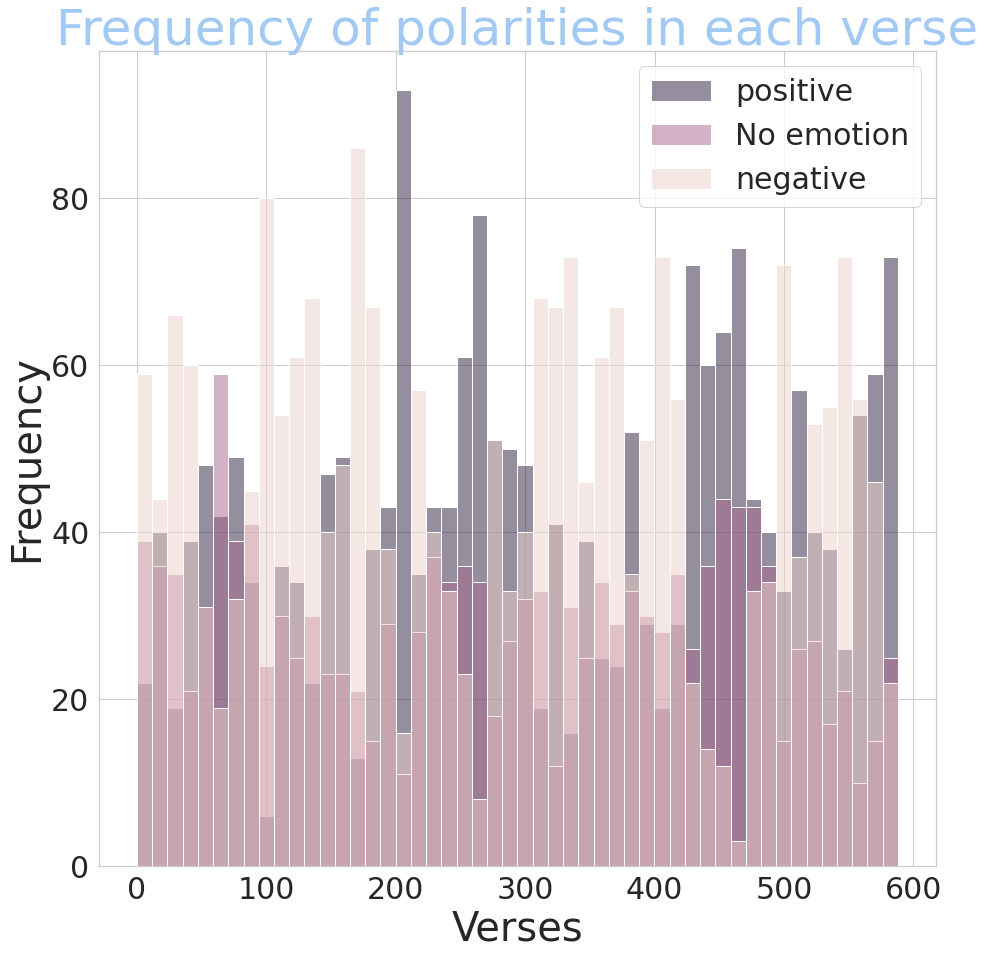

In [115]:
f, ax = plt.subplots(figsize=(15, 15))

a=sns.histplot(data=coders,x="verse_ID",hue="polarity",bins=50)
a.set_xlabel("Verses",fontsize=40)
a.tick_params(labelsize=30)
a.axes.set_title("Frequency of polarities in each verse",fontsize=50,c="b")
a.set_ylabel("Frequency",fontsize=40)

a.legend(["positive","No emotion","negative"],fontsize=30)
plt.show()

The variability is quite big having in mind that mean for each verse is almost zero.Most verses have negatiive feelings and some of them have very strong.

Now lets see the mean polarity on all heroes in one graph

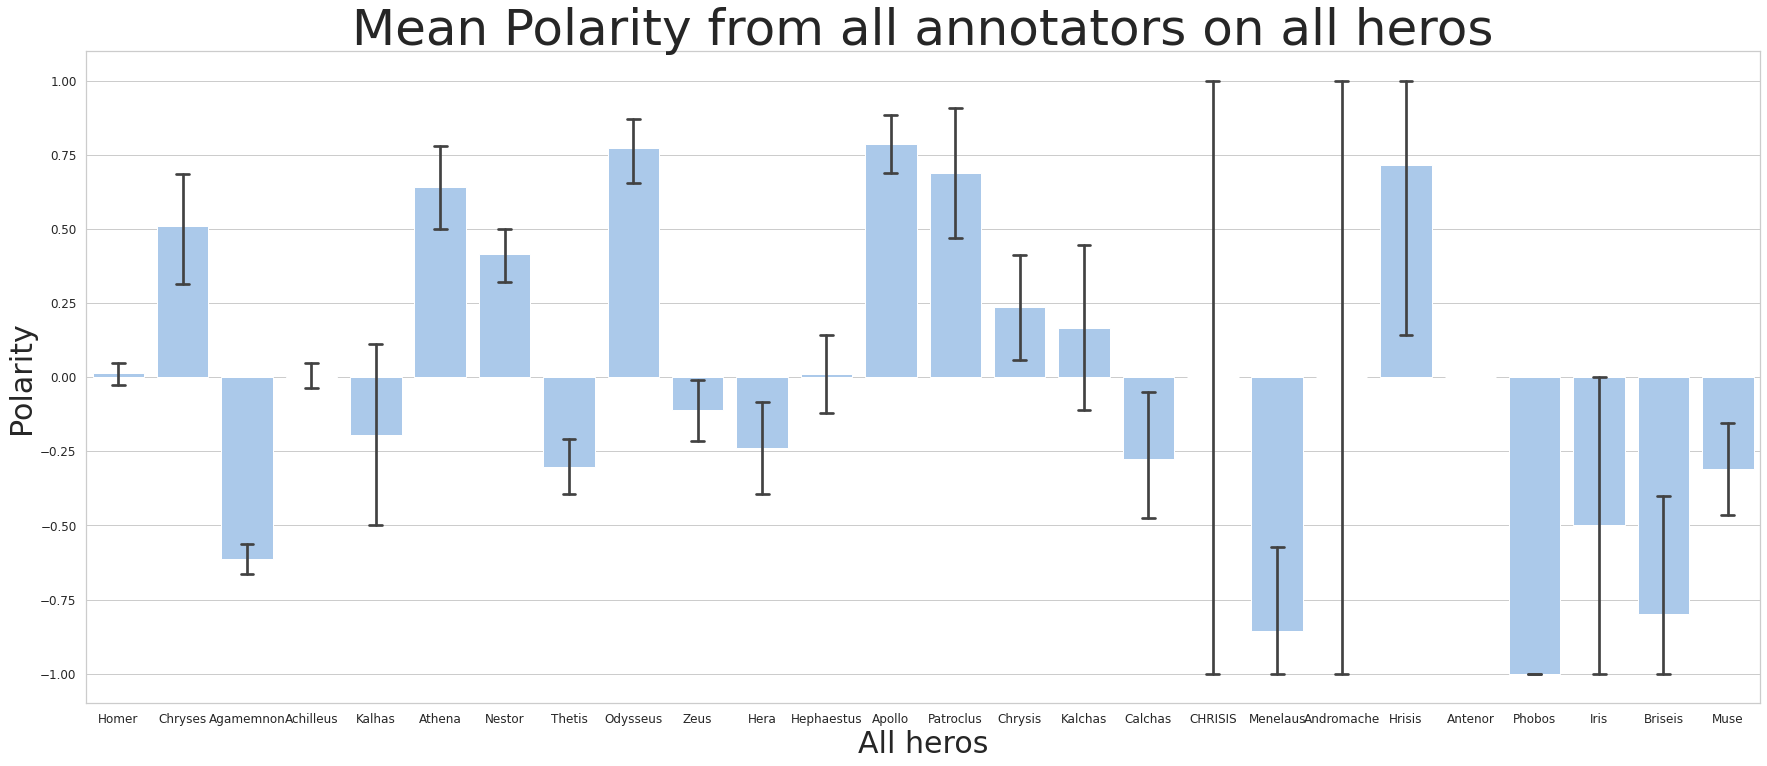

In [116]:
### graphs  ##error
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(30, 12))

sns.set_color_codes("pastel")
a=sns.barplot(x="hero", y="polarity", data=coders,capsize=0.2,
            label="Total", color="b")
a.set_xlabel("All heros",fontsize=30)
a.tick_params(labelsize=12)
a.axes.set_title("Mean Polarity from all annotators on all heros",fontsize=50)
a.set_ylabel("Polarity",fontsize=30)
plt.show()

Agamemnon and Phobos were strongly negative.On the other hand Athena and Apollo were positively annotated and Achileas close to zero.That happened because because the positive and the negatie lines were almost equally distributed. 

Next we find the top 10 heros

In [117]:
top_heroes=coders["hero"].value_counts()
top_heroes=top_heroes.index[0:10]
print(top_heroes)

Index(['Homer', 'Achilleus', 'Agamemnon', 'Thetis', 'Nestor', 'Zeus',
       'Hephaestus', 'Hera', 'Apollo', 'Athena'],
      dtype='object')


In [118]:
condition_tophero=np.array(coders.iloc[:,3].isin(top_heroes))
plot_heros=coders.iloc[condition_tophero,:]
plot_heros.shape

(5474, 4)

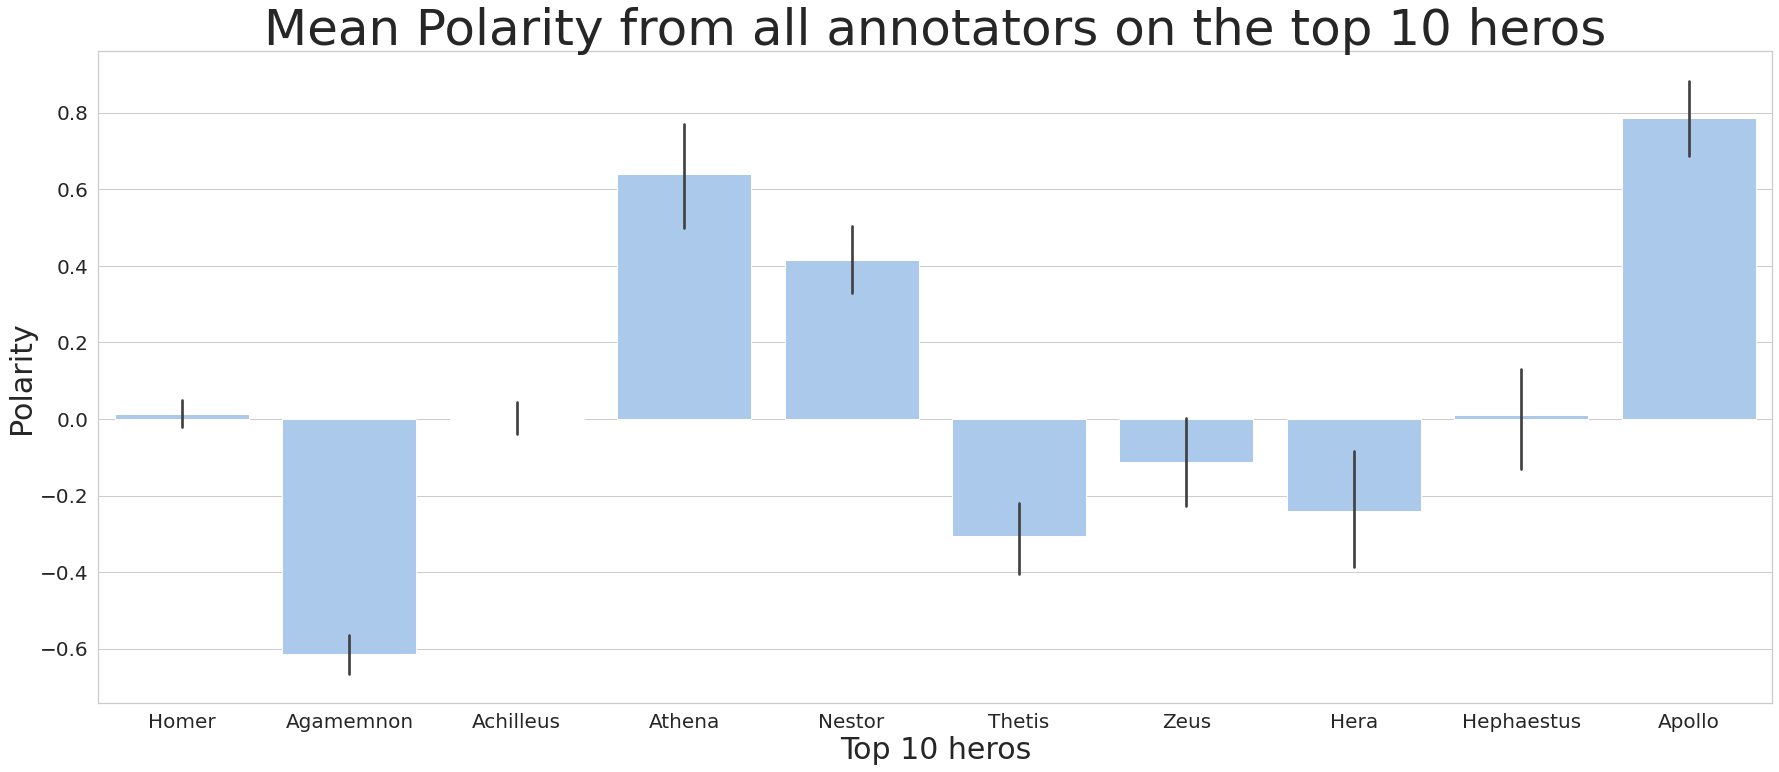

In [119]:
### graphs  ##error
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(30, 12))

sns.set_color_codes("pastel")
a=sns.barplot(x="hero", y="polarity", data=plot_heros,
            label="Total", color="b")
a.set_xlabel("Top 10 heros",fontsize=30)
a.tick_params(labelsize=20)
a.axes.set_title("Mean Polarity from all annotators on the top 10 heros",fontsize=50)
a.set_ylabel("Polarity",fontsize=30)
plt.show()

We see that homer is one of the top 10 due to the assumption i made that none values on hero show that homer was speaking.And as expected homer had a polarity close to zero because the narrating doesn't have much emotion to pass.

I did the same graph for each annotator this time:

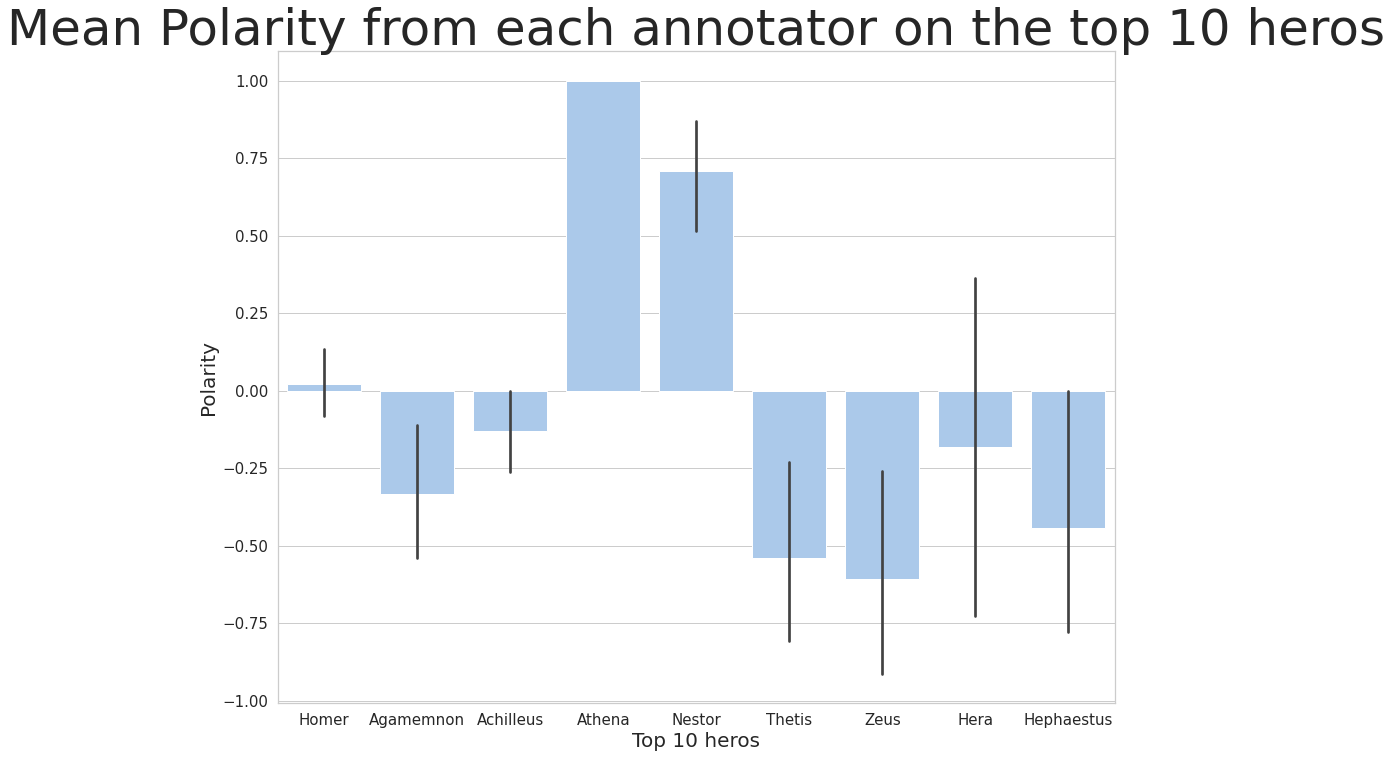

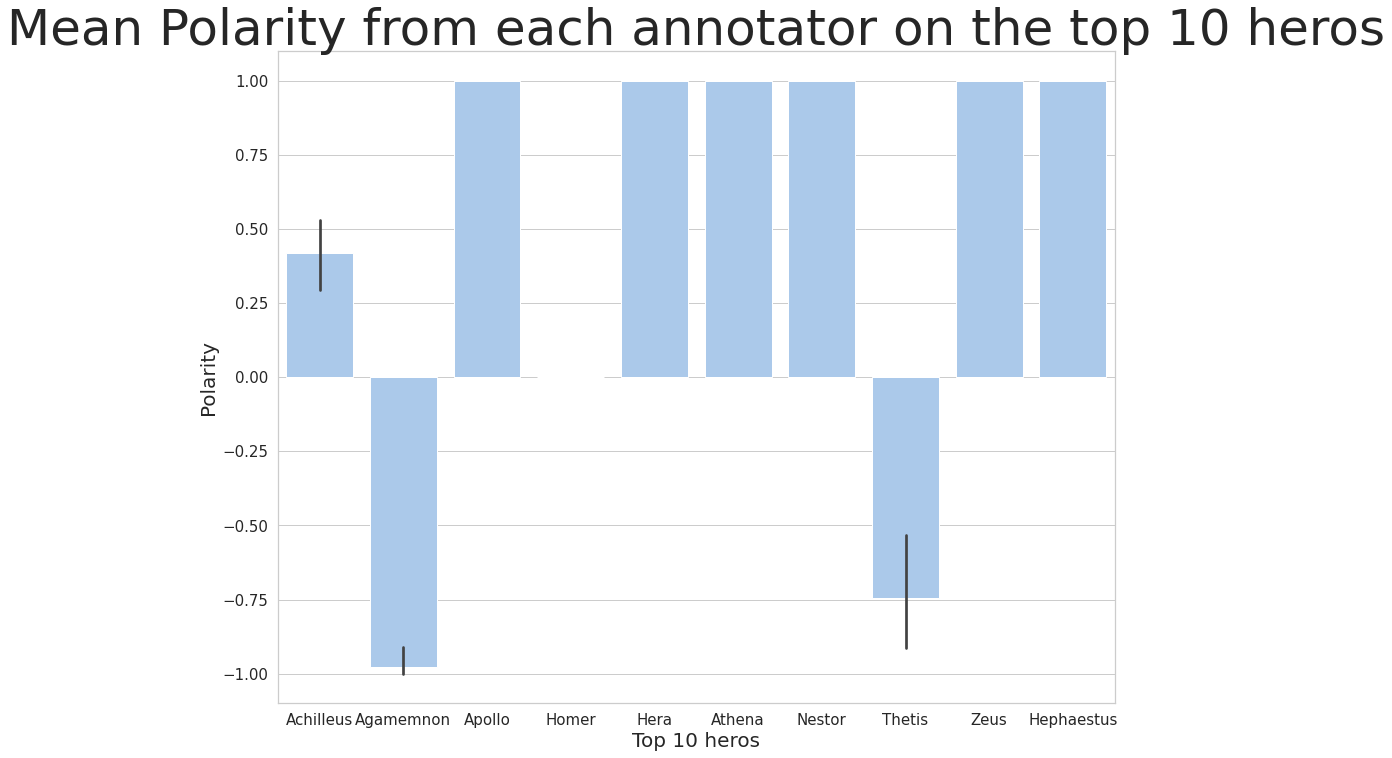

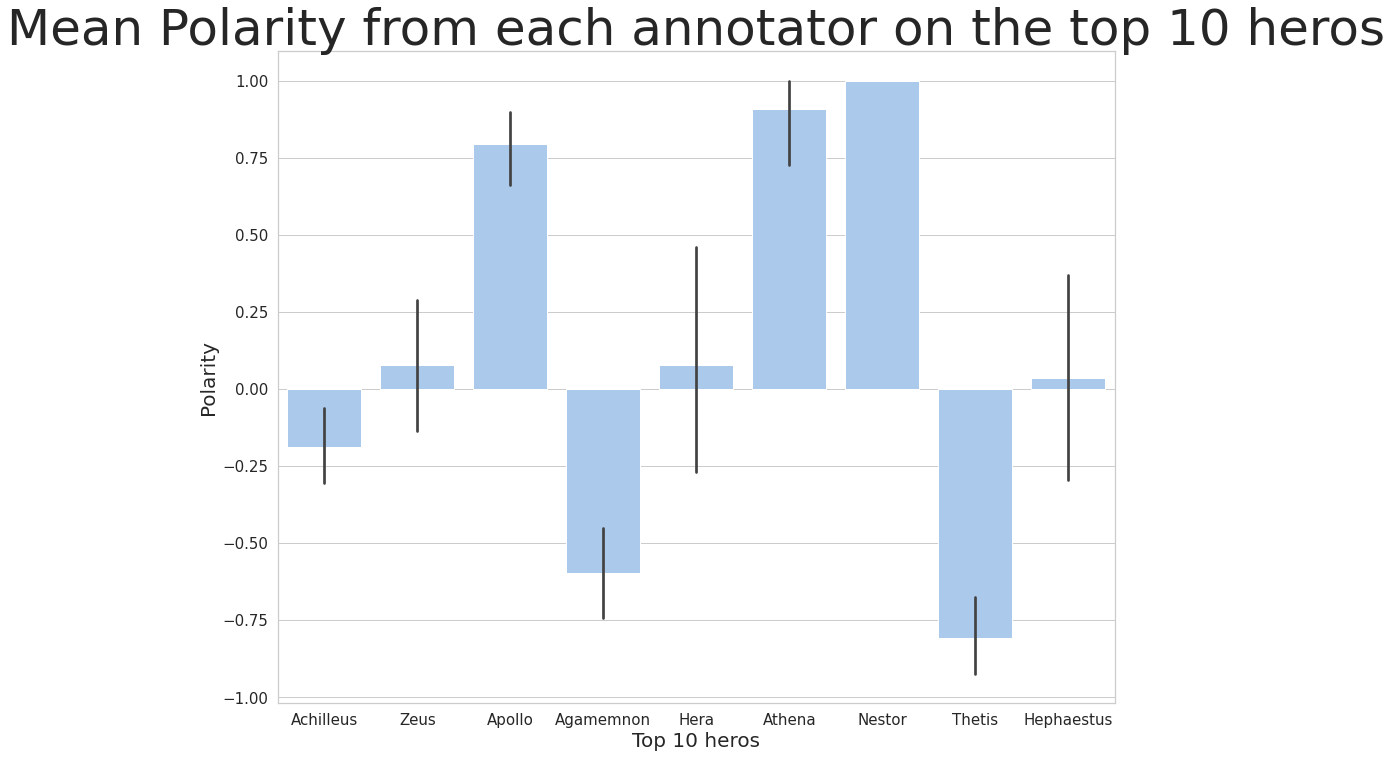

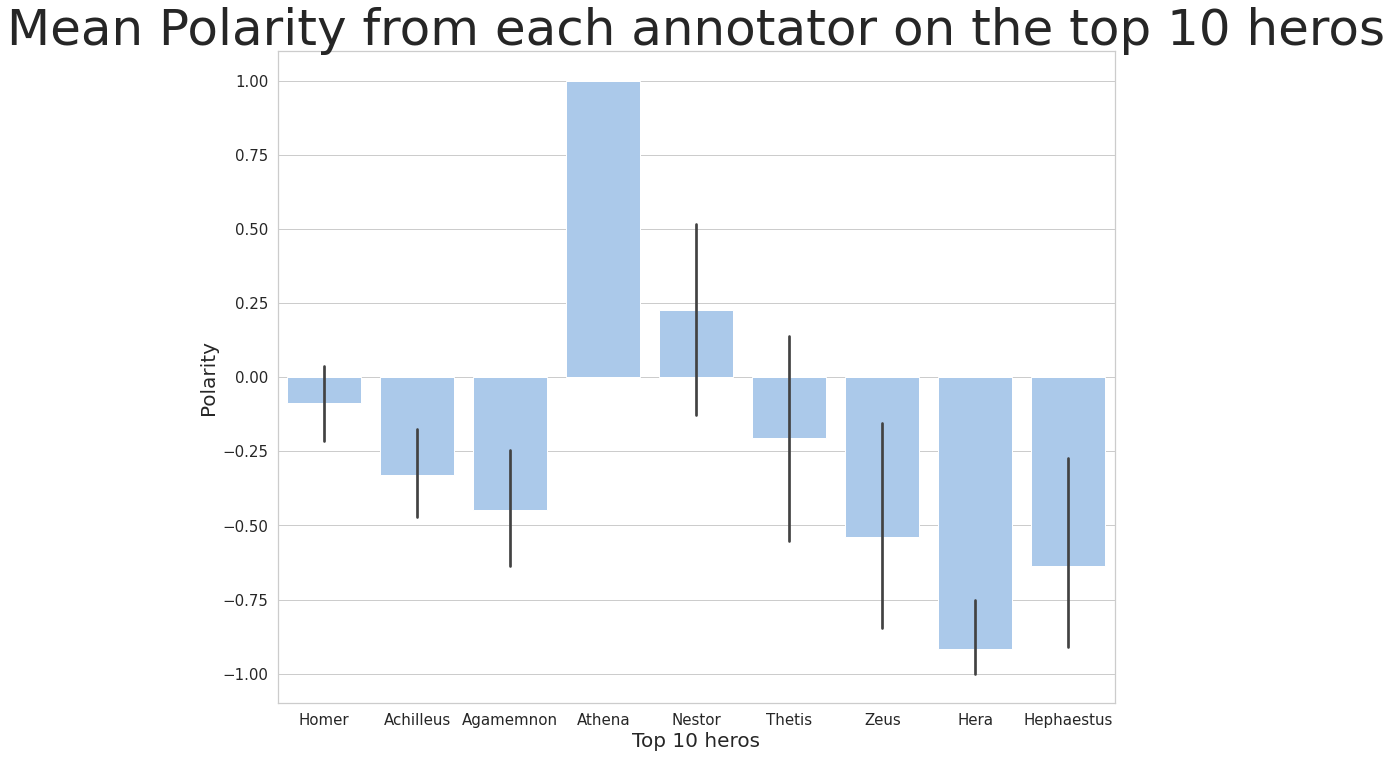

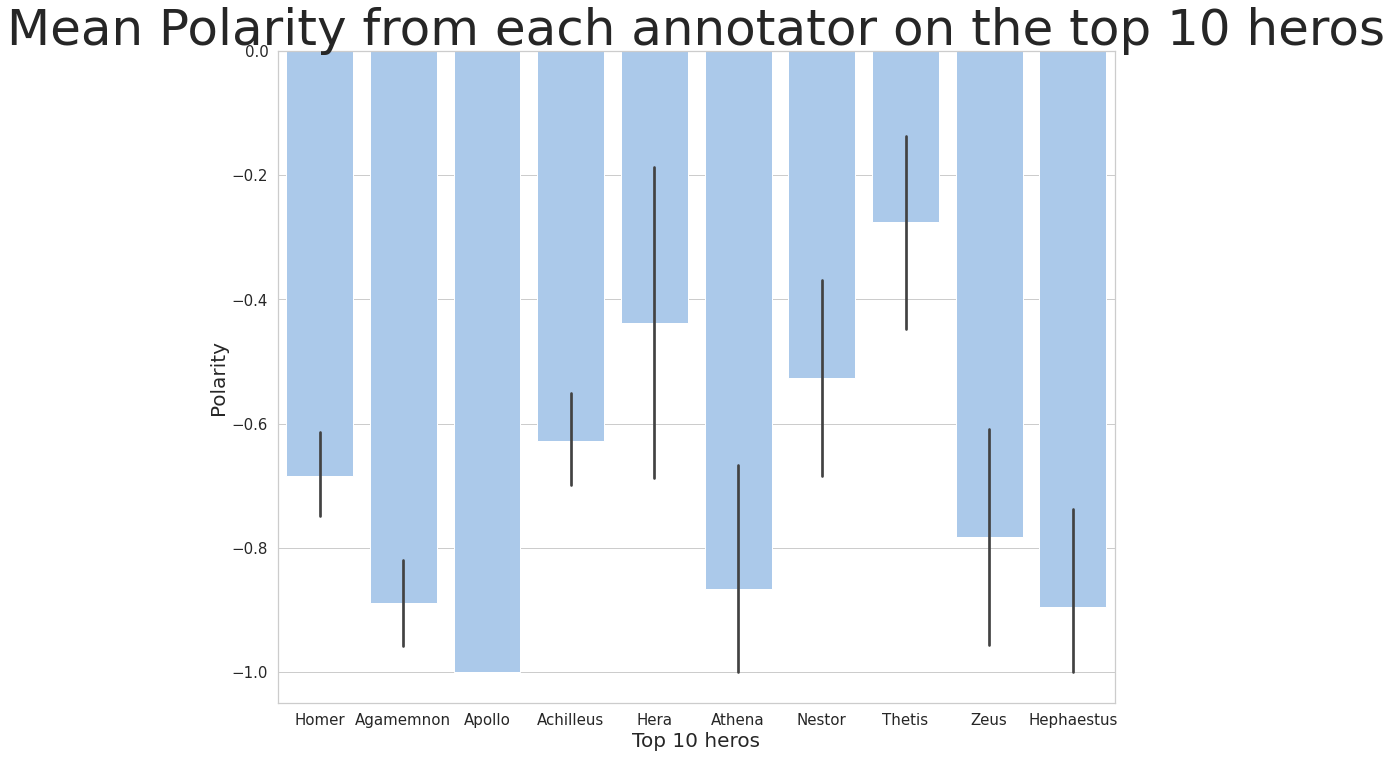

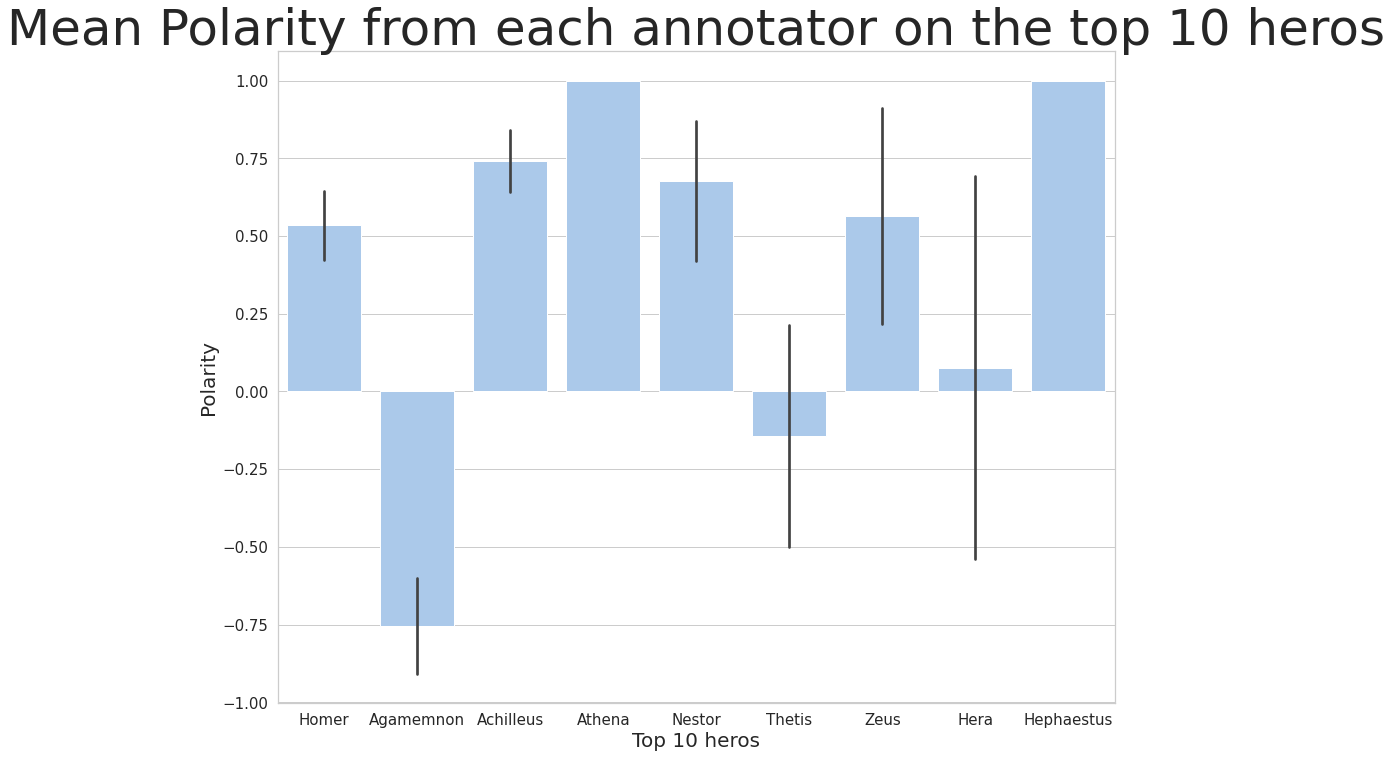

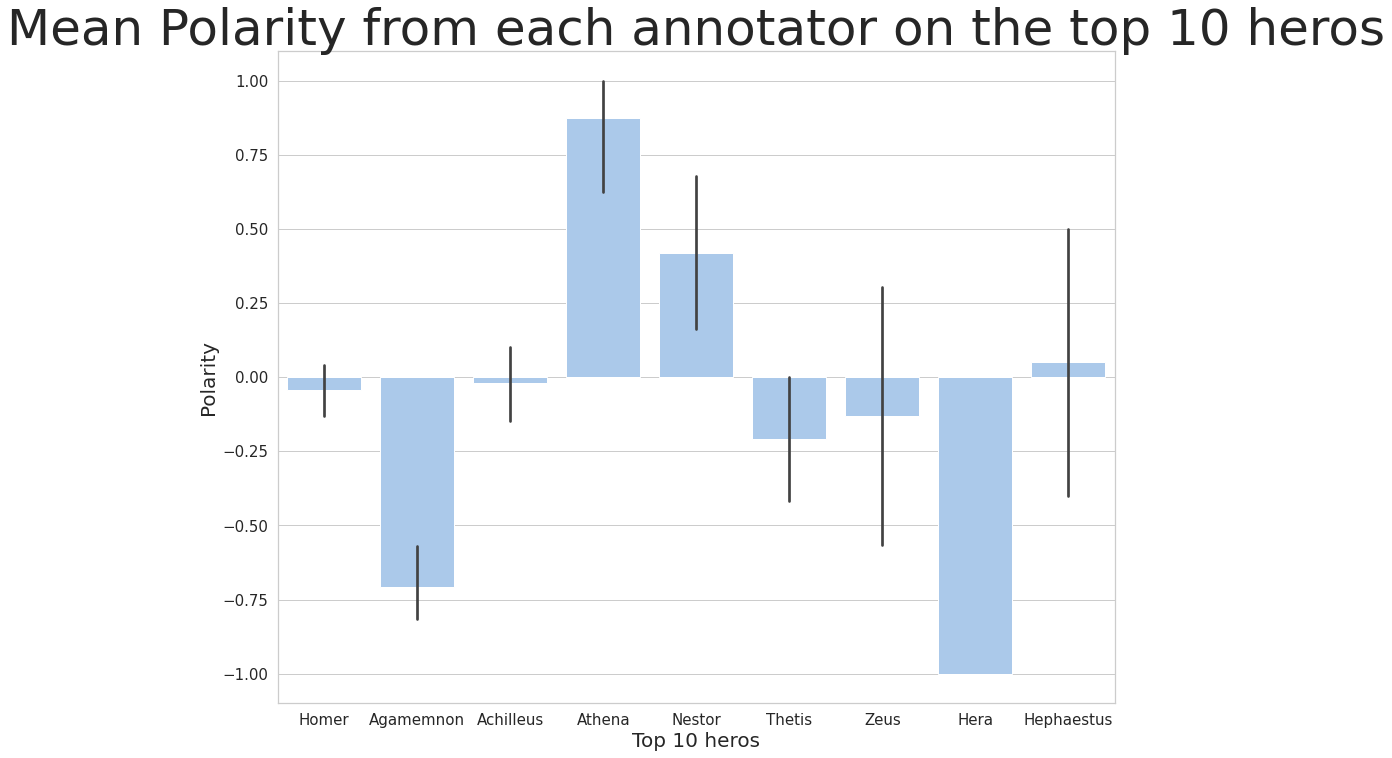

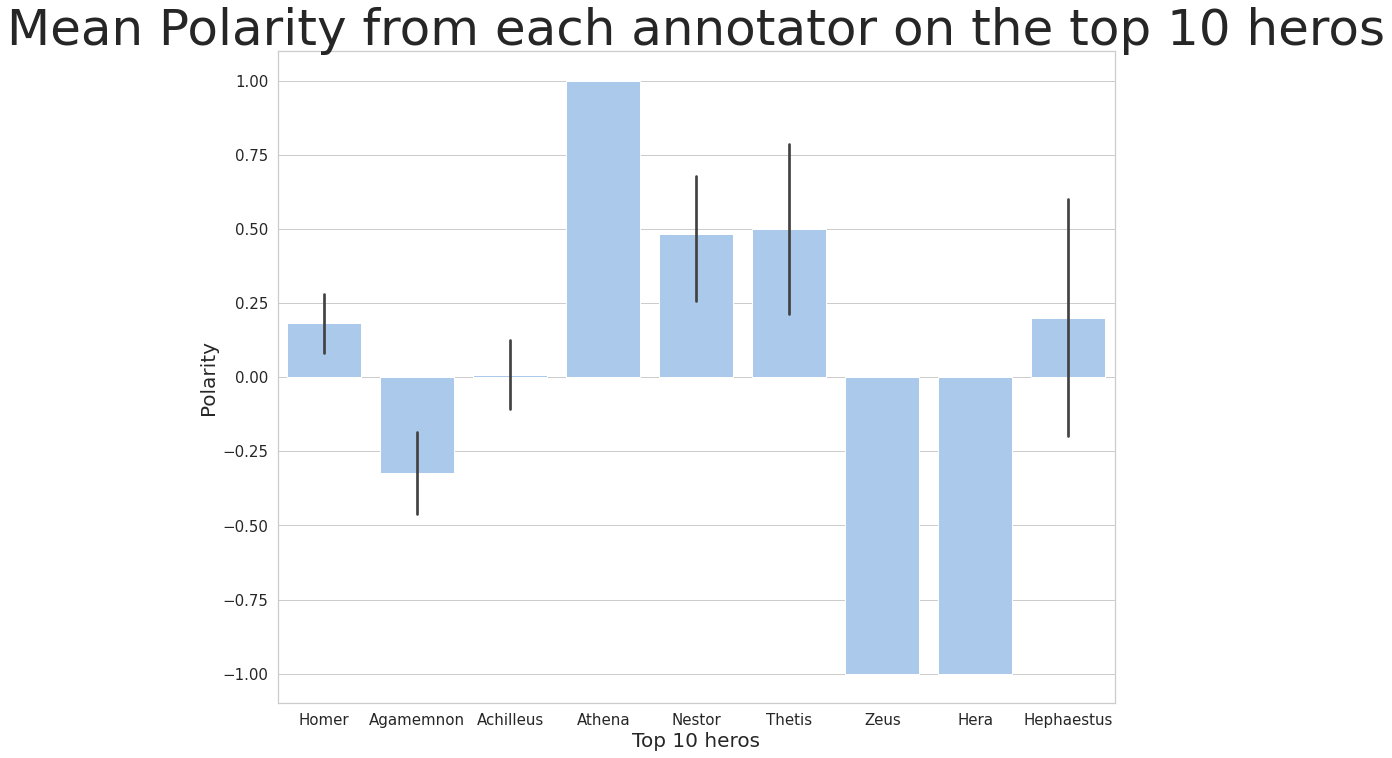

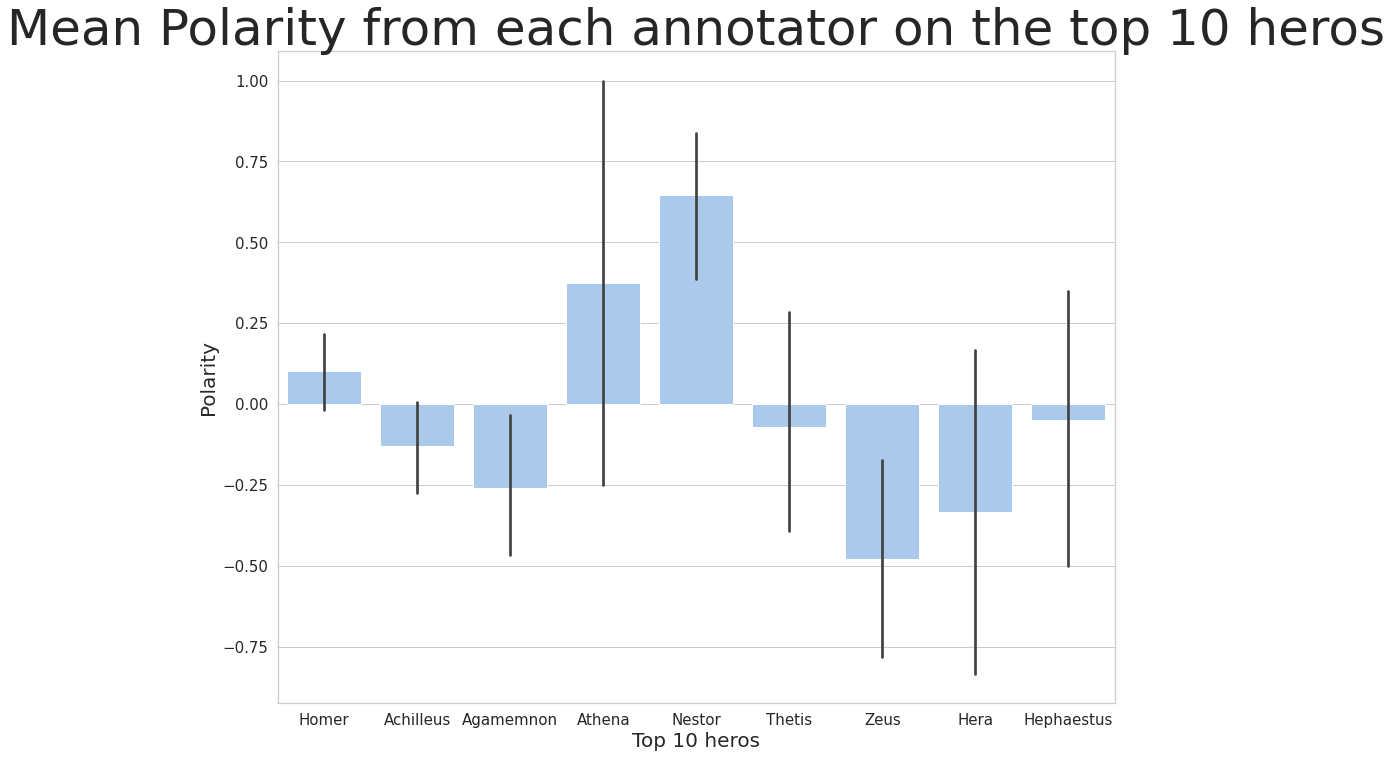

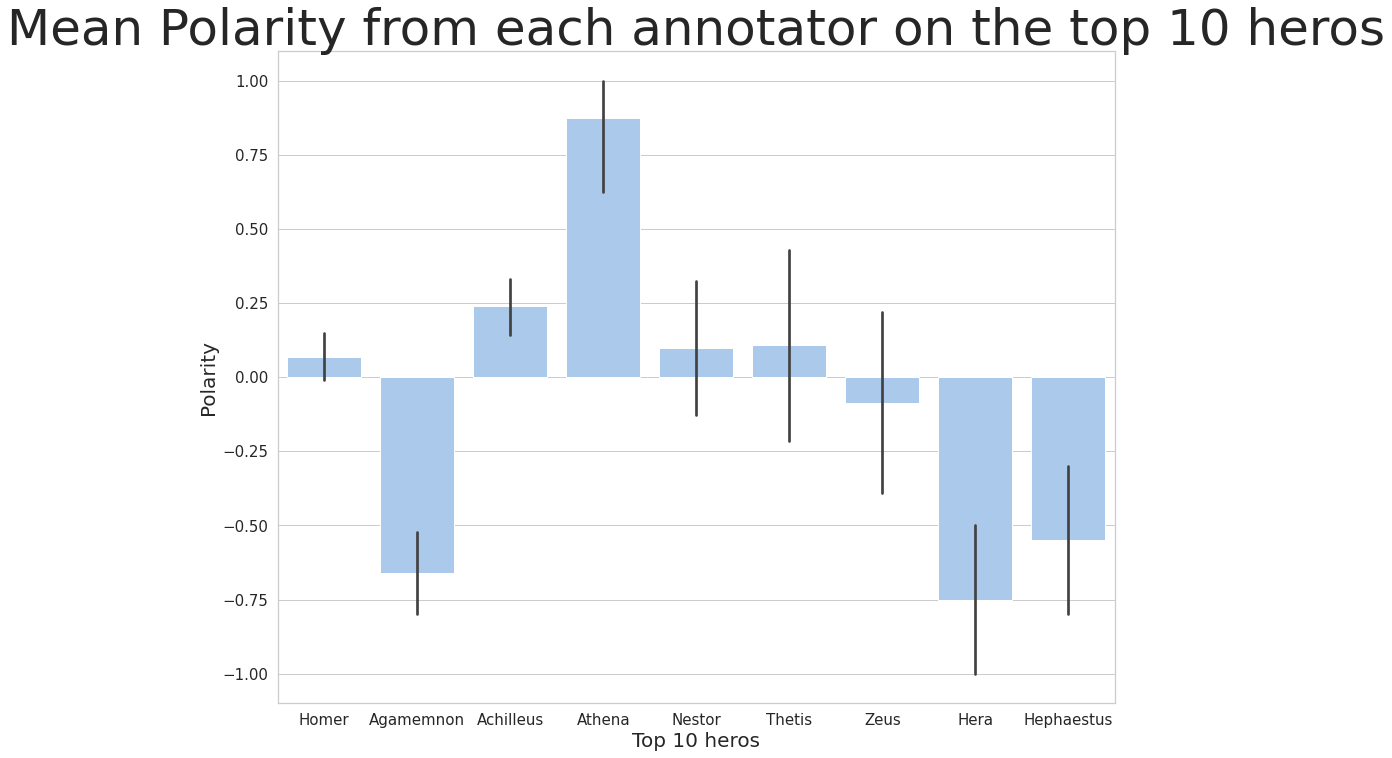

In [120]:
### for every annotator

for ID in temp_ID:
    sns.set_theme(style="whitegrid")
    f, ax = plt.subplots(figsize=(15, 12))
    sns.set_color_codes("pastel")
    a=sns.barplot(x="hero", y="polarity", data=plot_heros.loc[(ID),:],
            label="Total", color="b")
    a.set_xlabel("Top 10 heros",fontsize=20)
    a.tick_params(labelsize=15)
    a.axes.set_title("Mean Polarity from each annotator on the top 10 heros",fontsize=50)
    a.set_ylabel("Polarity",fontsize=20)
plt.show()

The same logic but insted of hero i selected emotion.

In [121]:
top_emotions=coders["emotions"].value_counts()
top_emotions=top_emotions.index[0:10]
print(top_emotions)

Index(['little emotion', 'anger', 'admiration', 'distress', 'joy', 'suspense',
       'sadness', 'awe', 'hope', 'acknowledgement'],
      dtype='object')


In [122]:
condition_topemotions=np.array(coders.iloc[:,2].isin(top_emotions))
plot_emotions=coders.iloc[condition_topemotions,:]
plot_emotions.shape

(3501, 4)

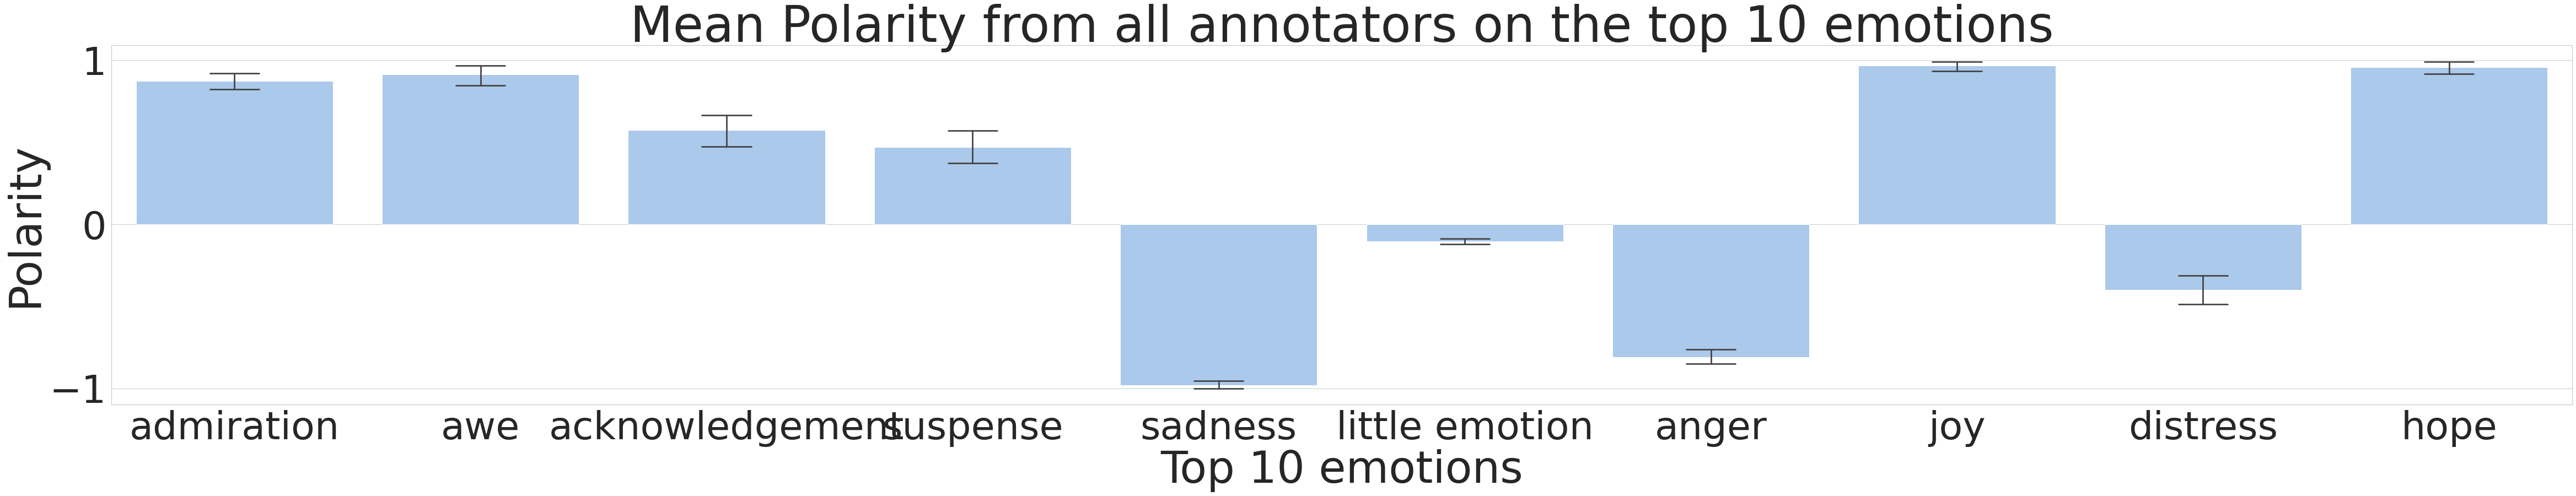

In [123]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(80, 12))

sns.set_color_codes("pastel")
a=sns.barplot(x="emotions", y="polarity", data=plot_emotions,capsize=0.2,
            label="Total", color="b")
a.set_xlabel("Top 10 emotions",fontsize=80)
a.tick_params(labelsize=70)
a.axes.set_title("Mean Polarity from all annotators on the top 10 emotions",fontsize=90)
a.set_ylabel("Polarity",fontsize=80)
plt.show()

We observe that each annotator filled the true polarity for every emotion and didnt answer by chance except from suspense,which we could say is a strong emotion and it has mean polarity close to zero.That happens because some annotators selected positive polarity and some negative with suspense.

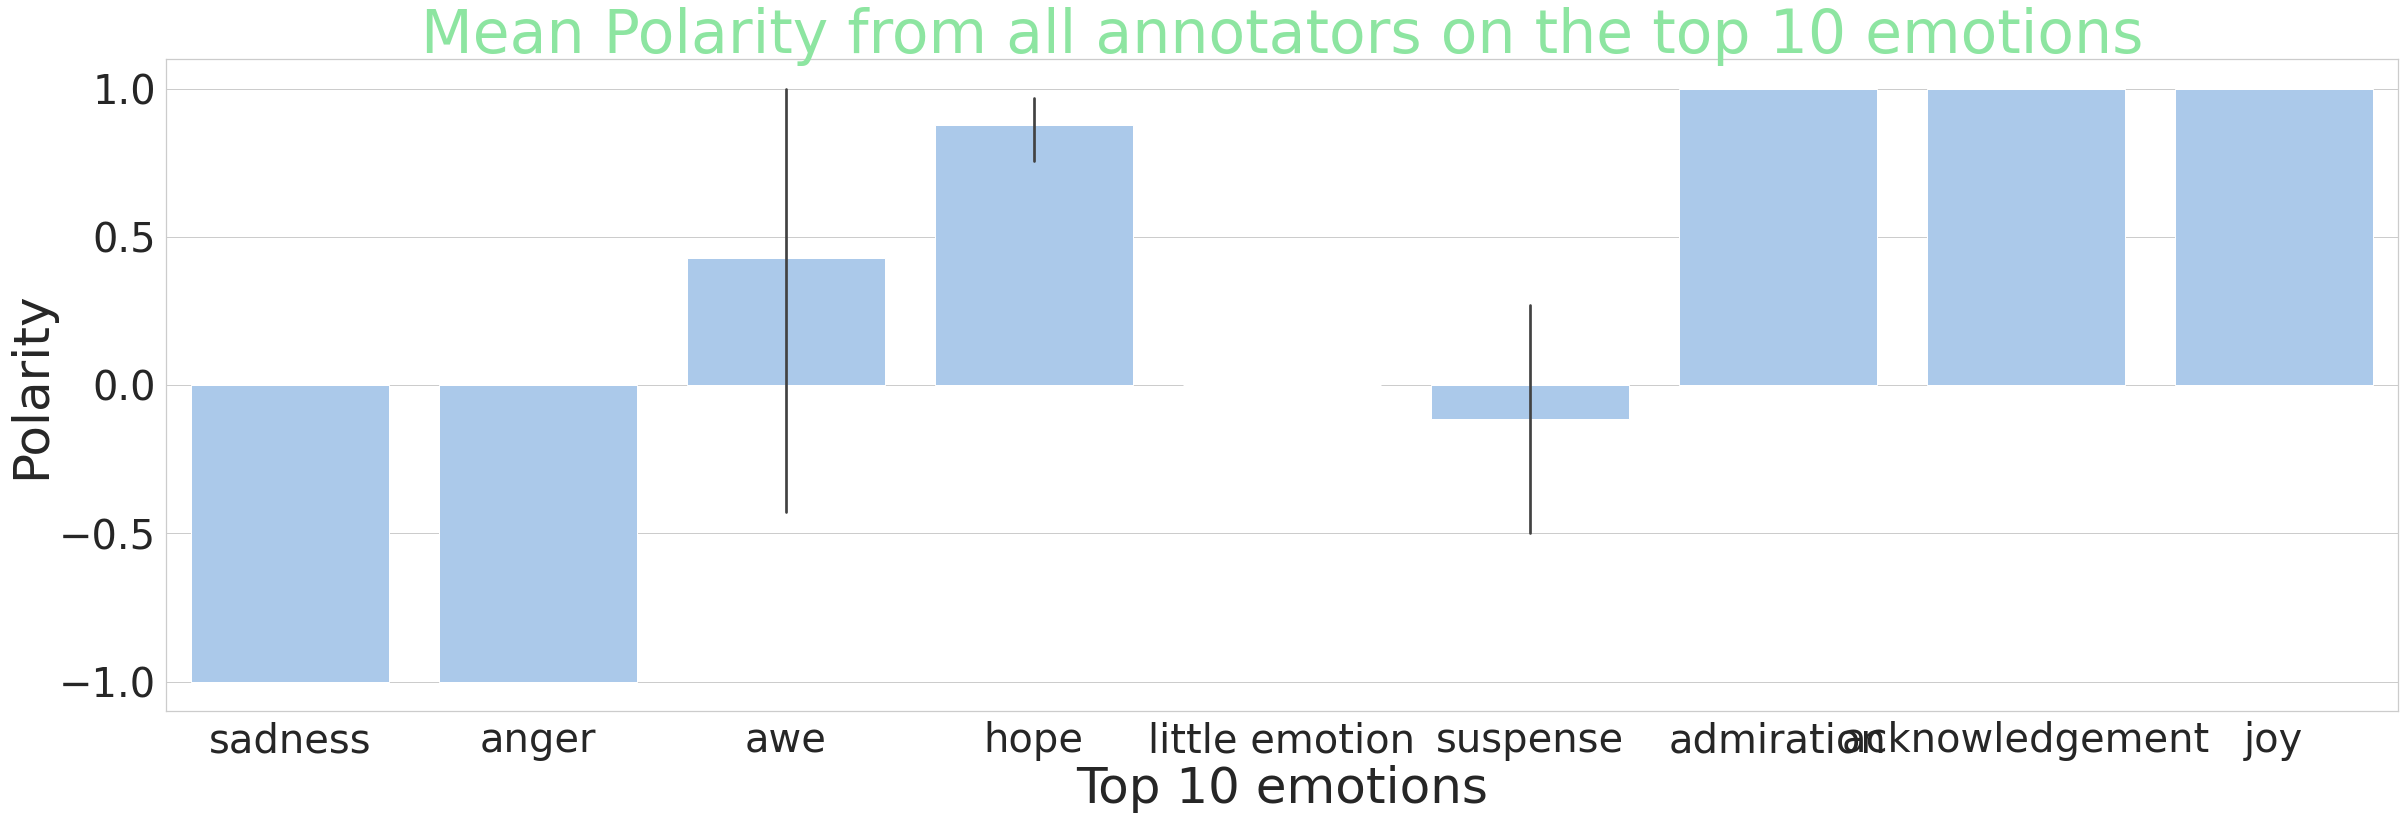

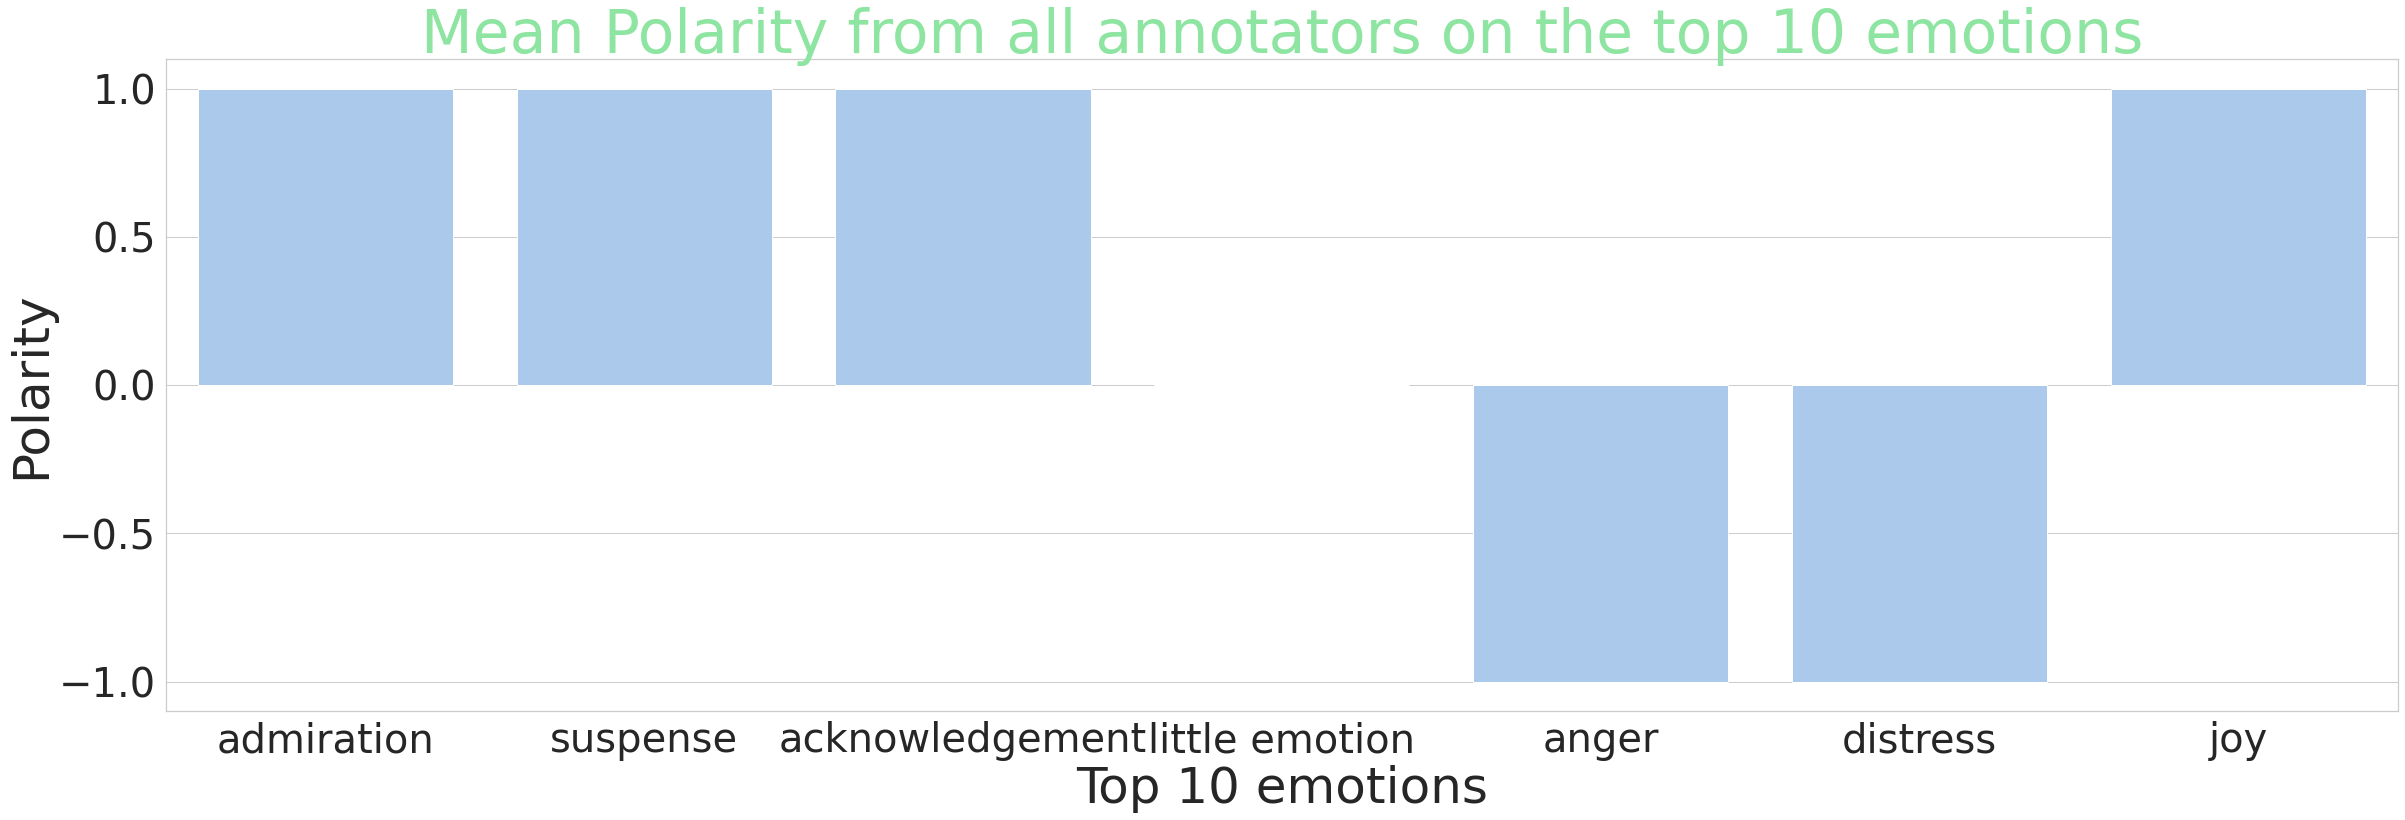

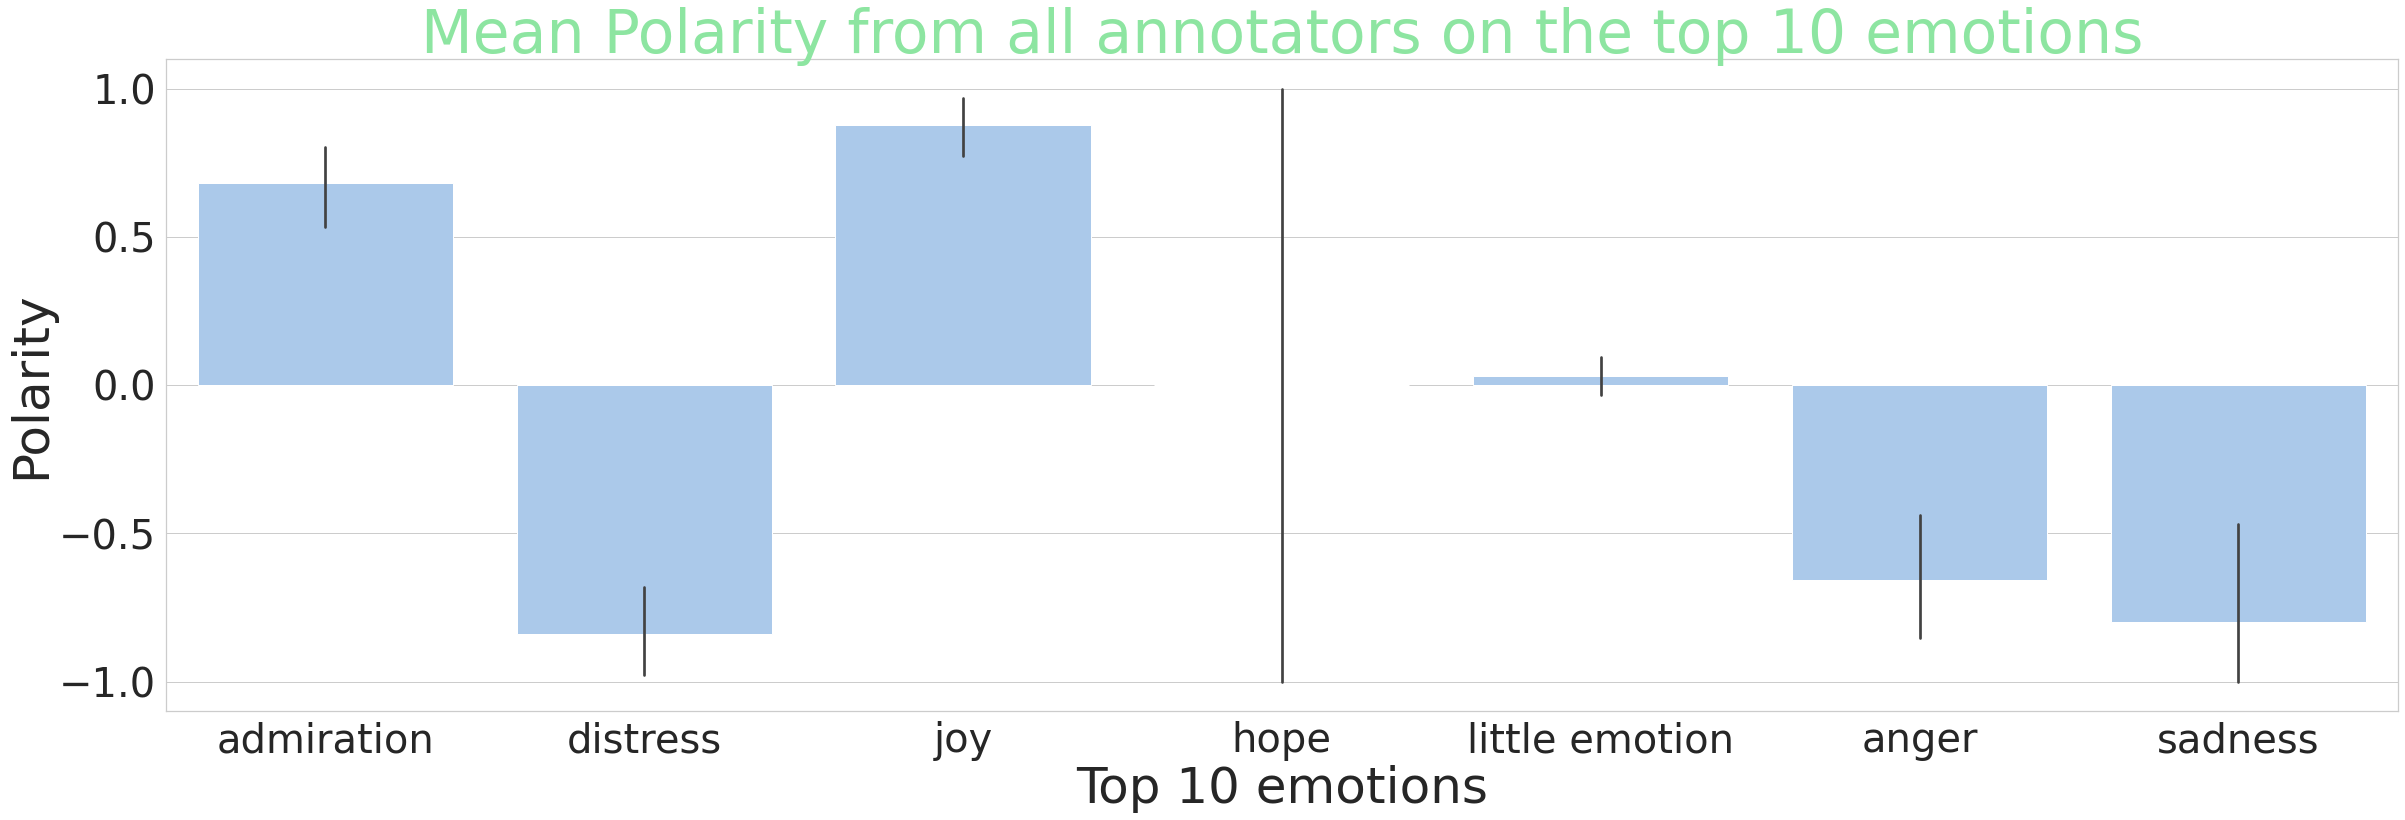

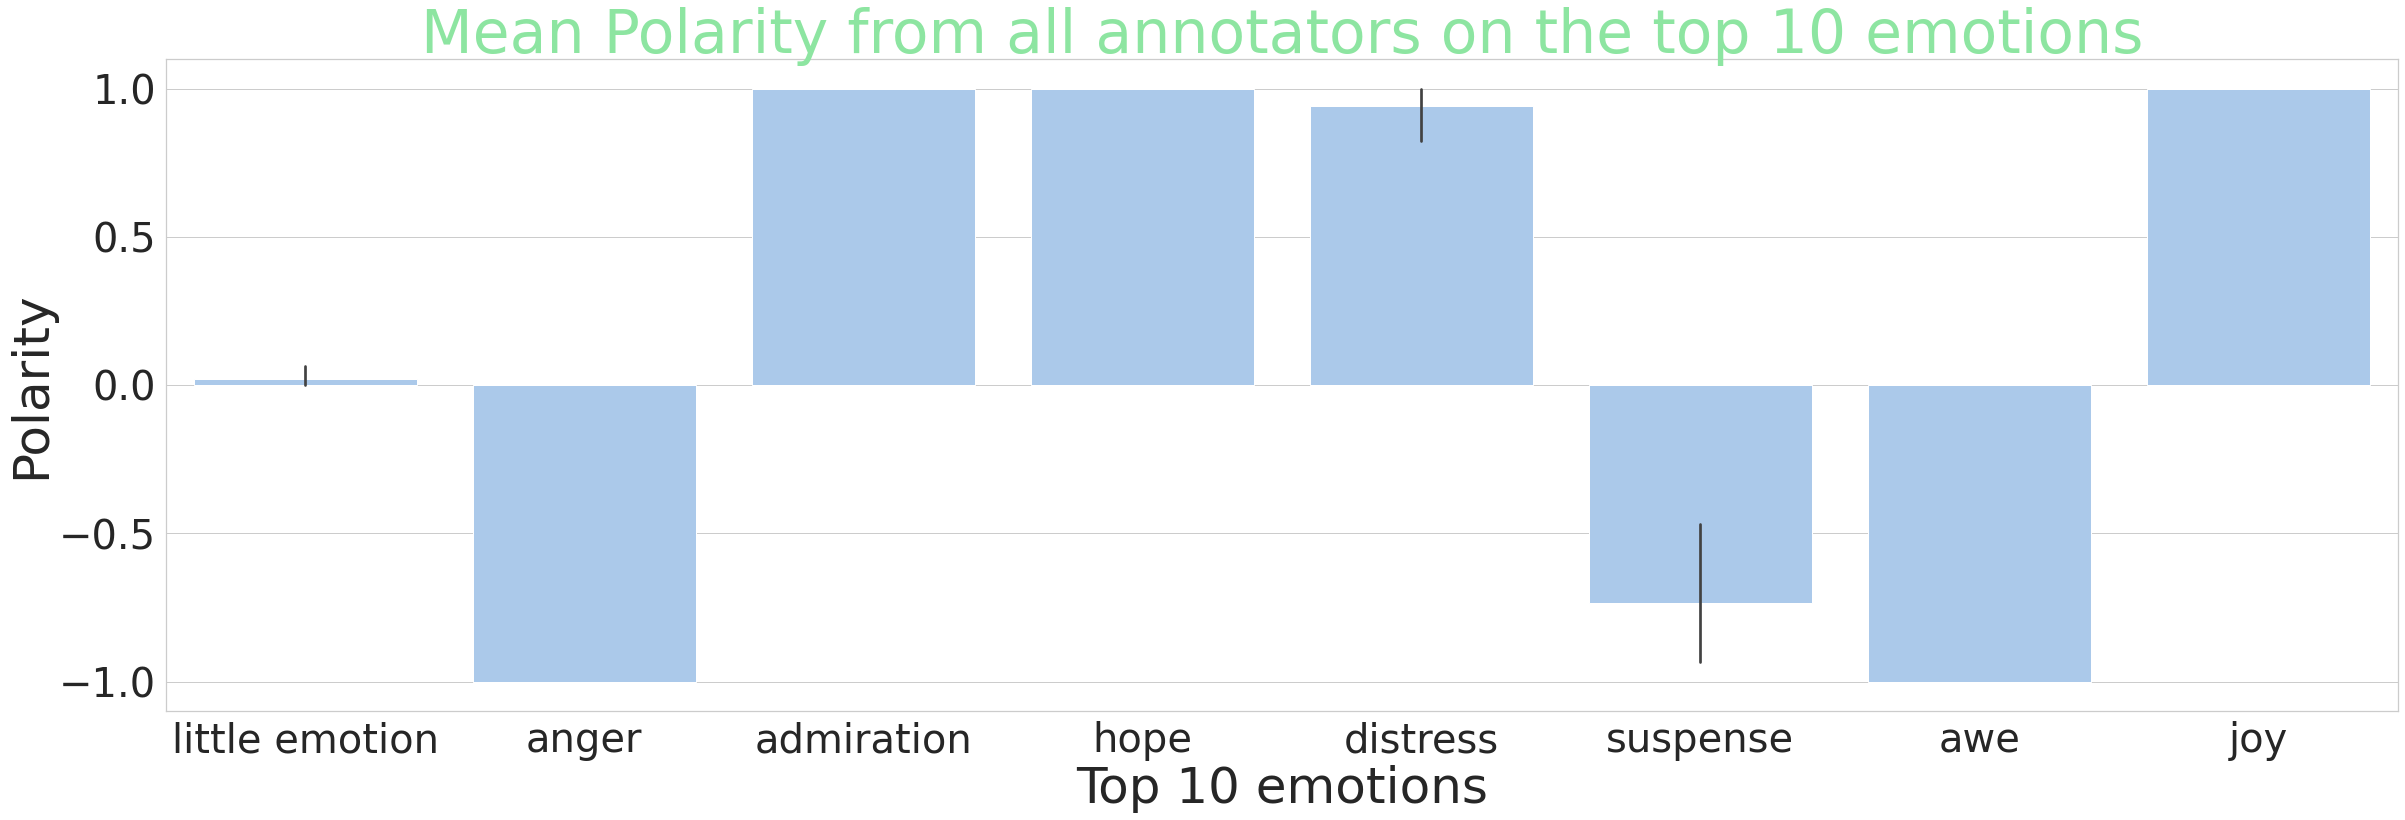

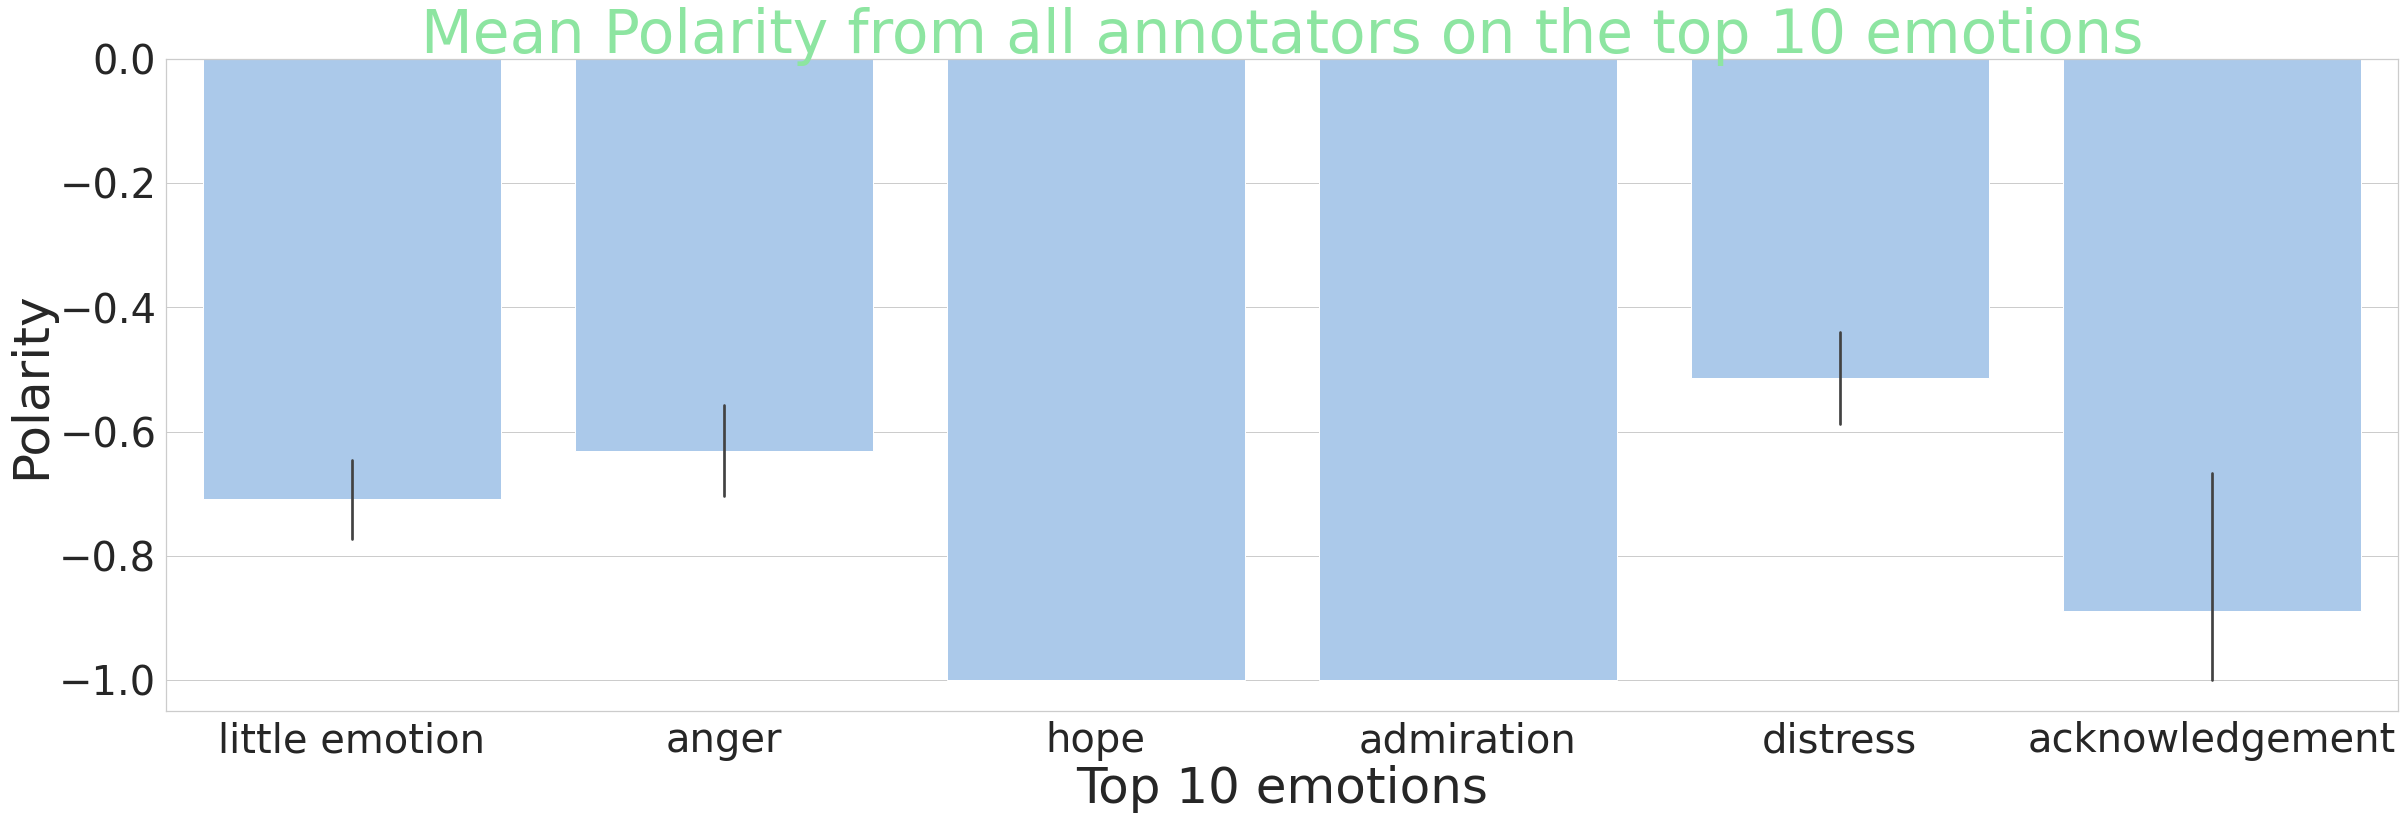

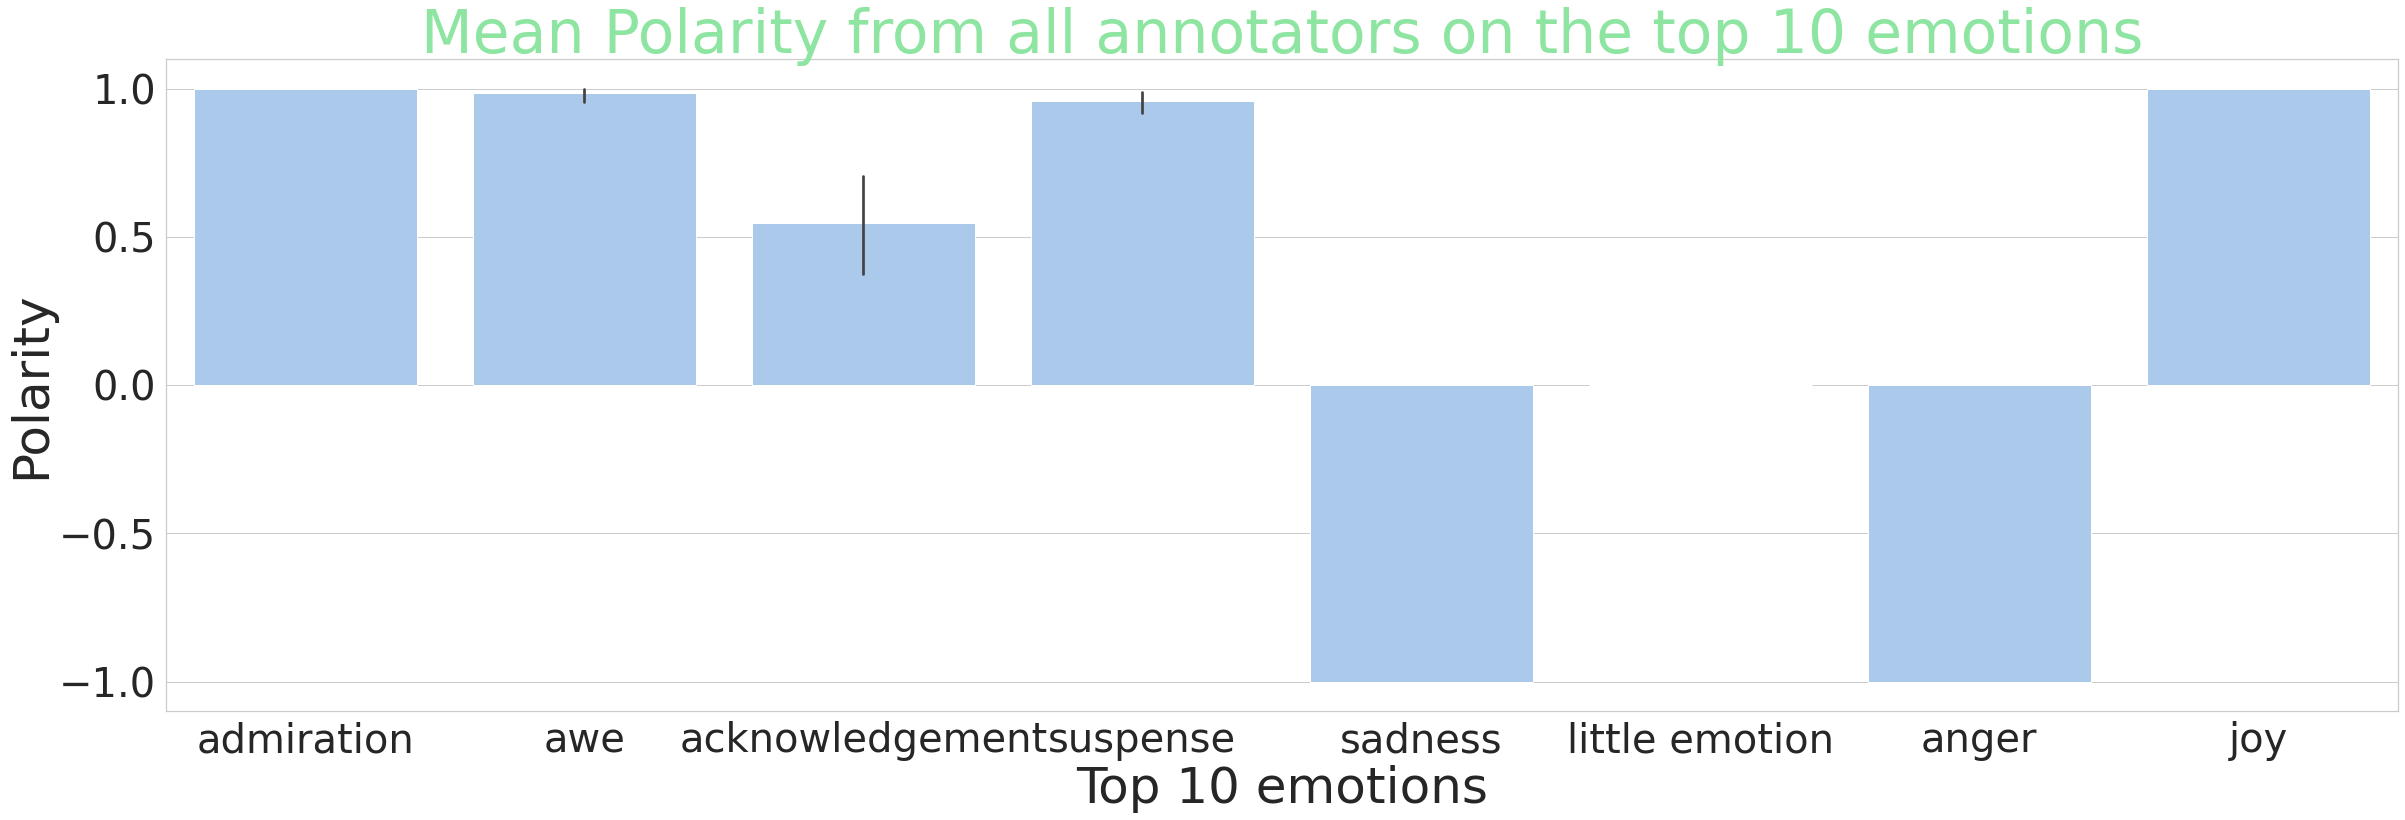

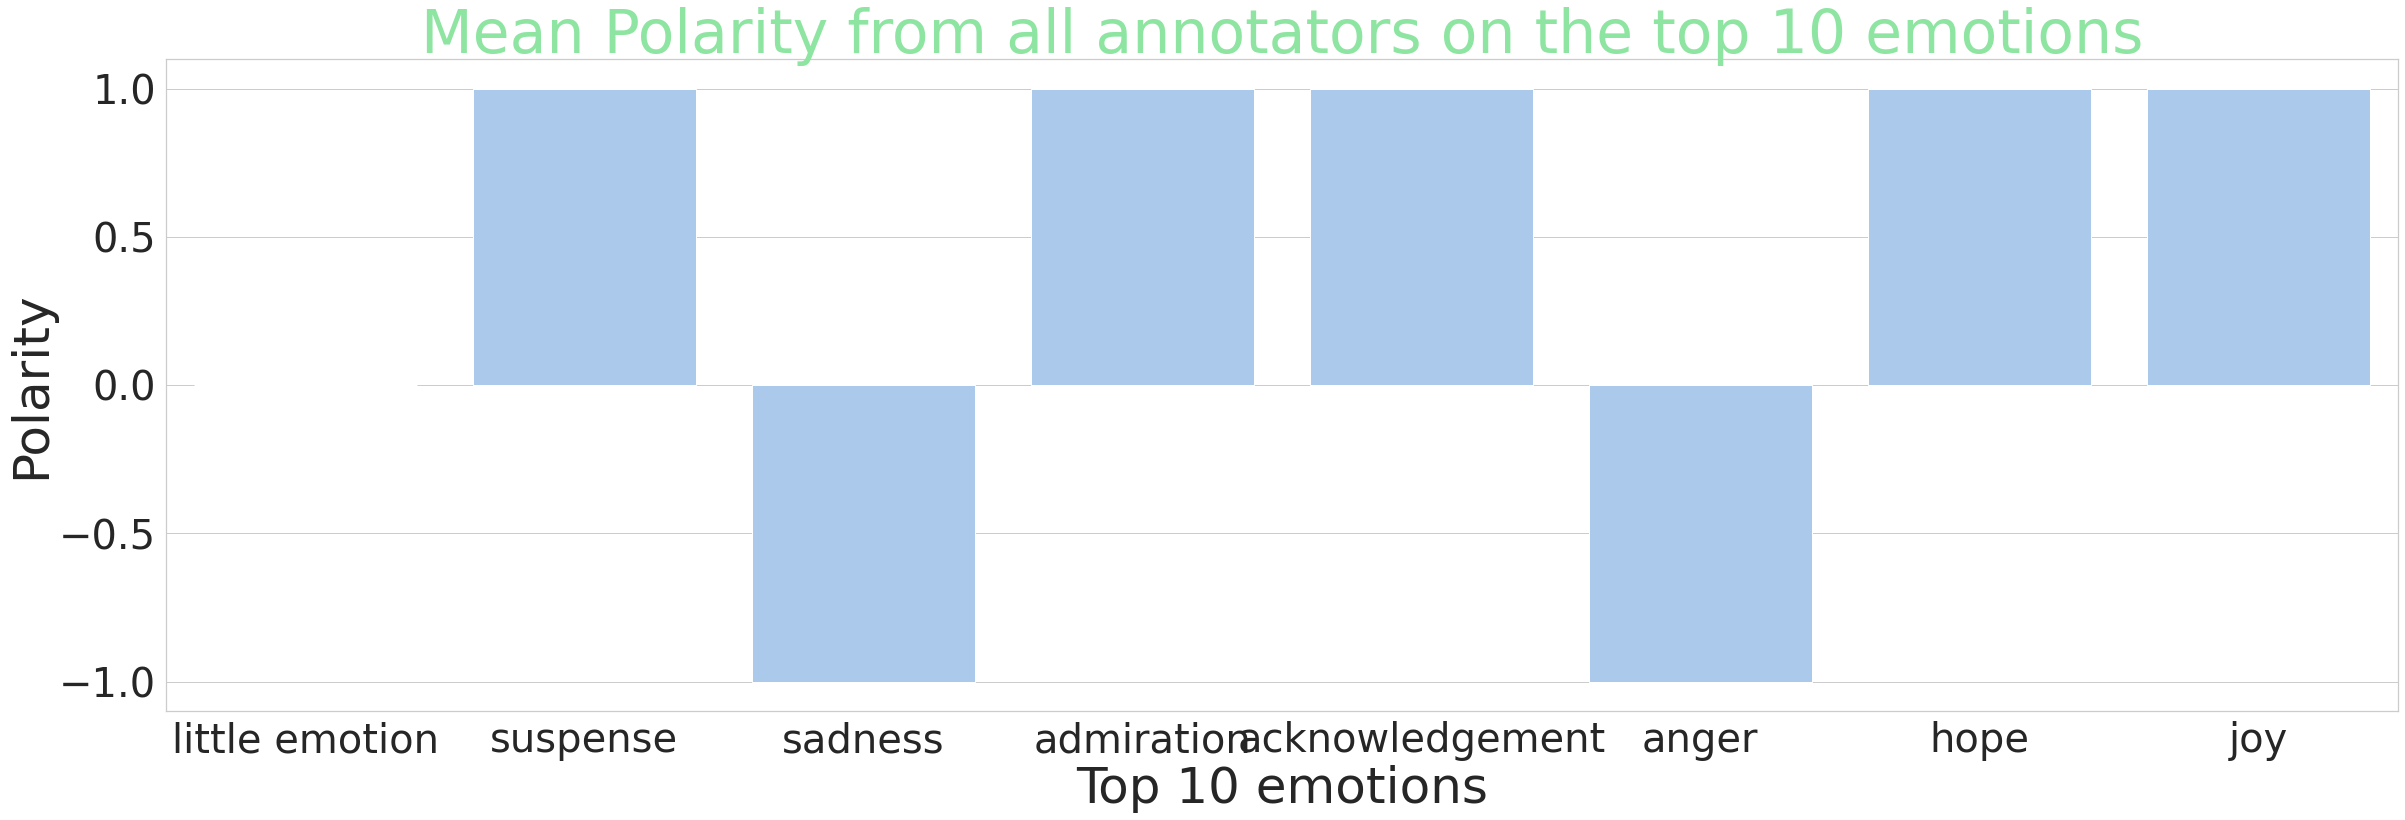

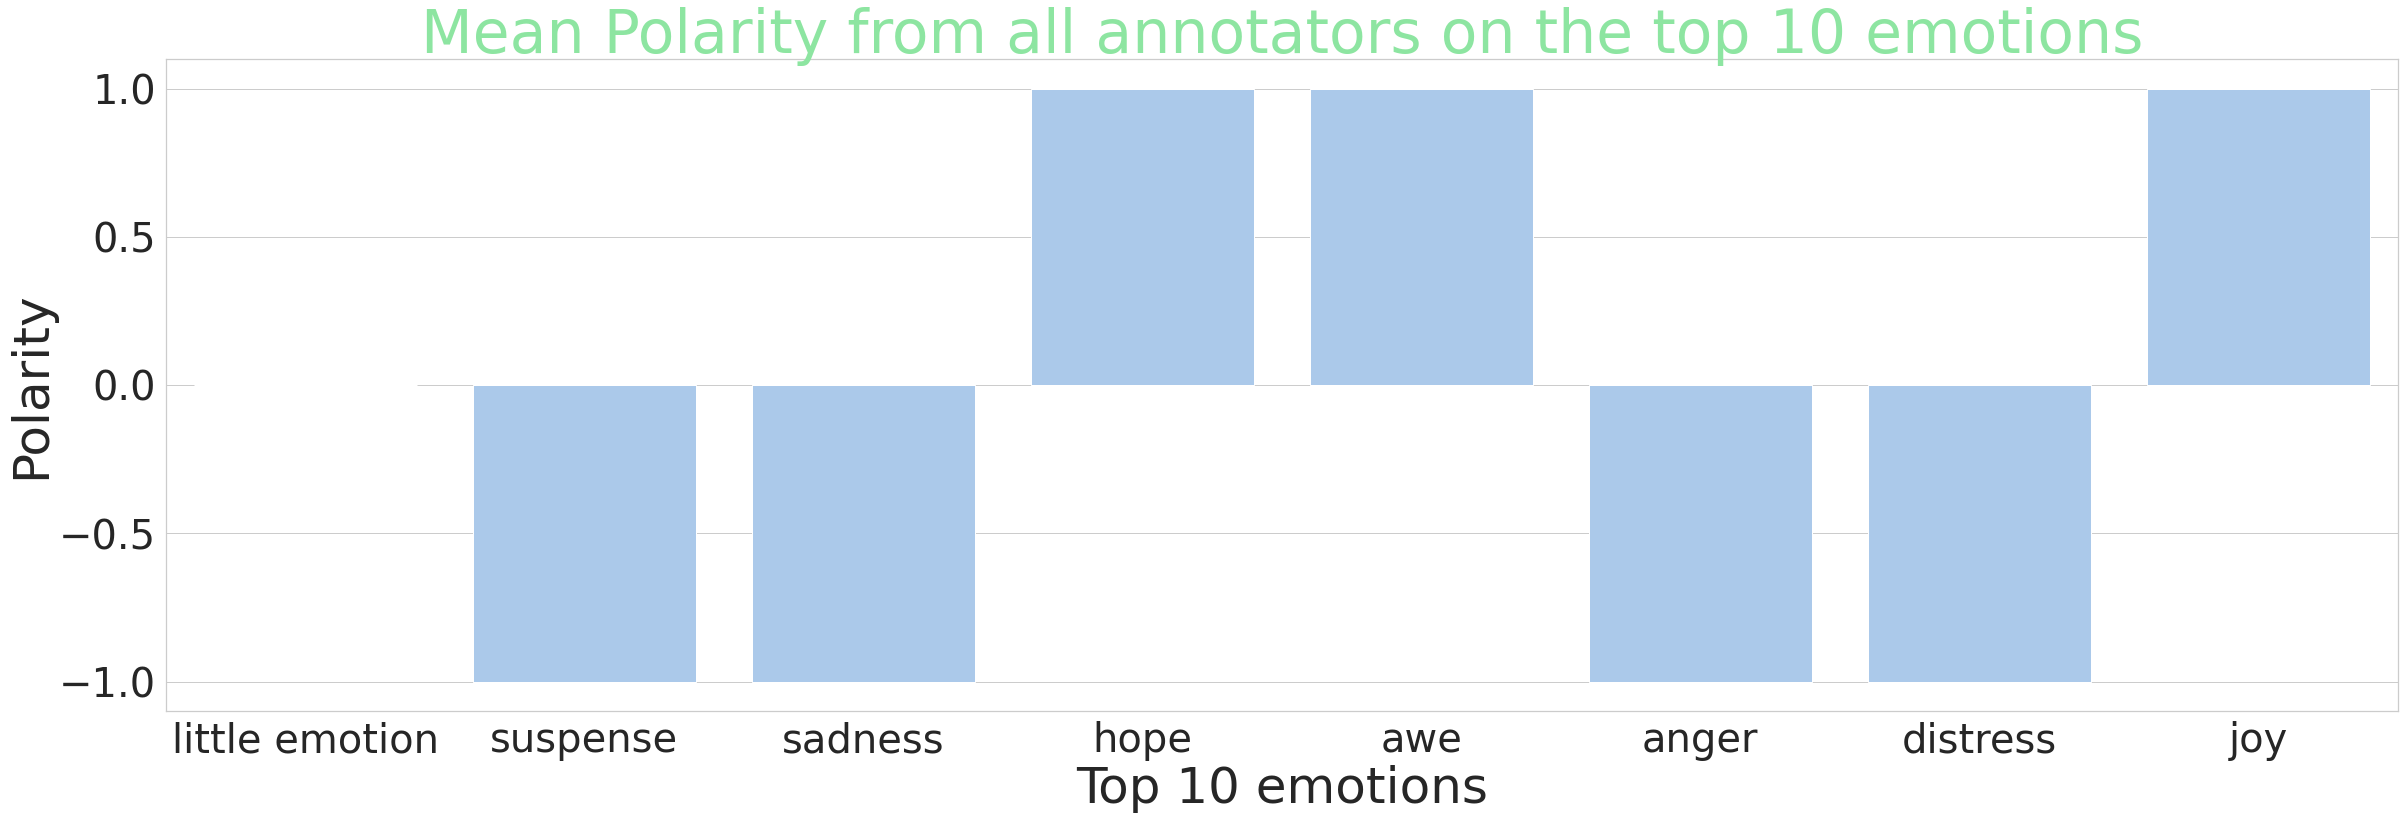

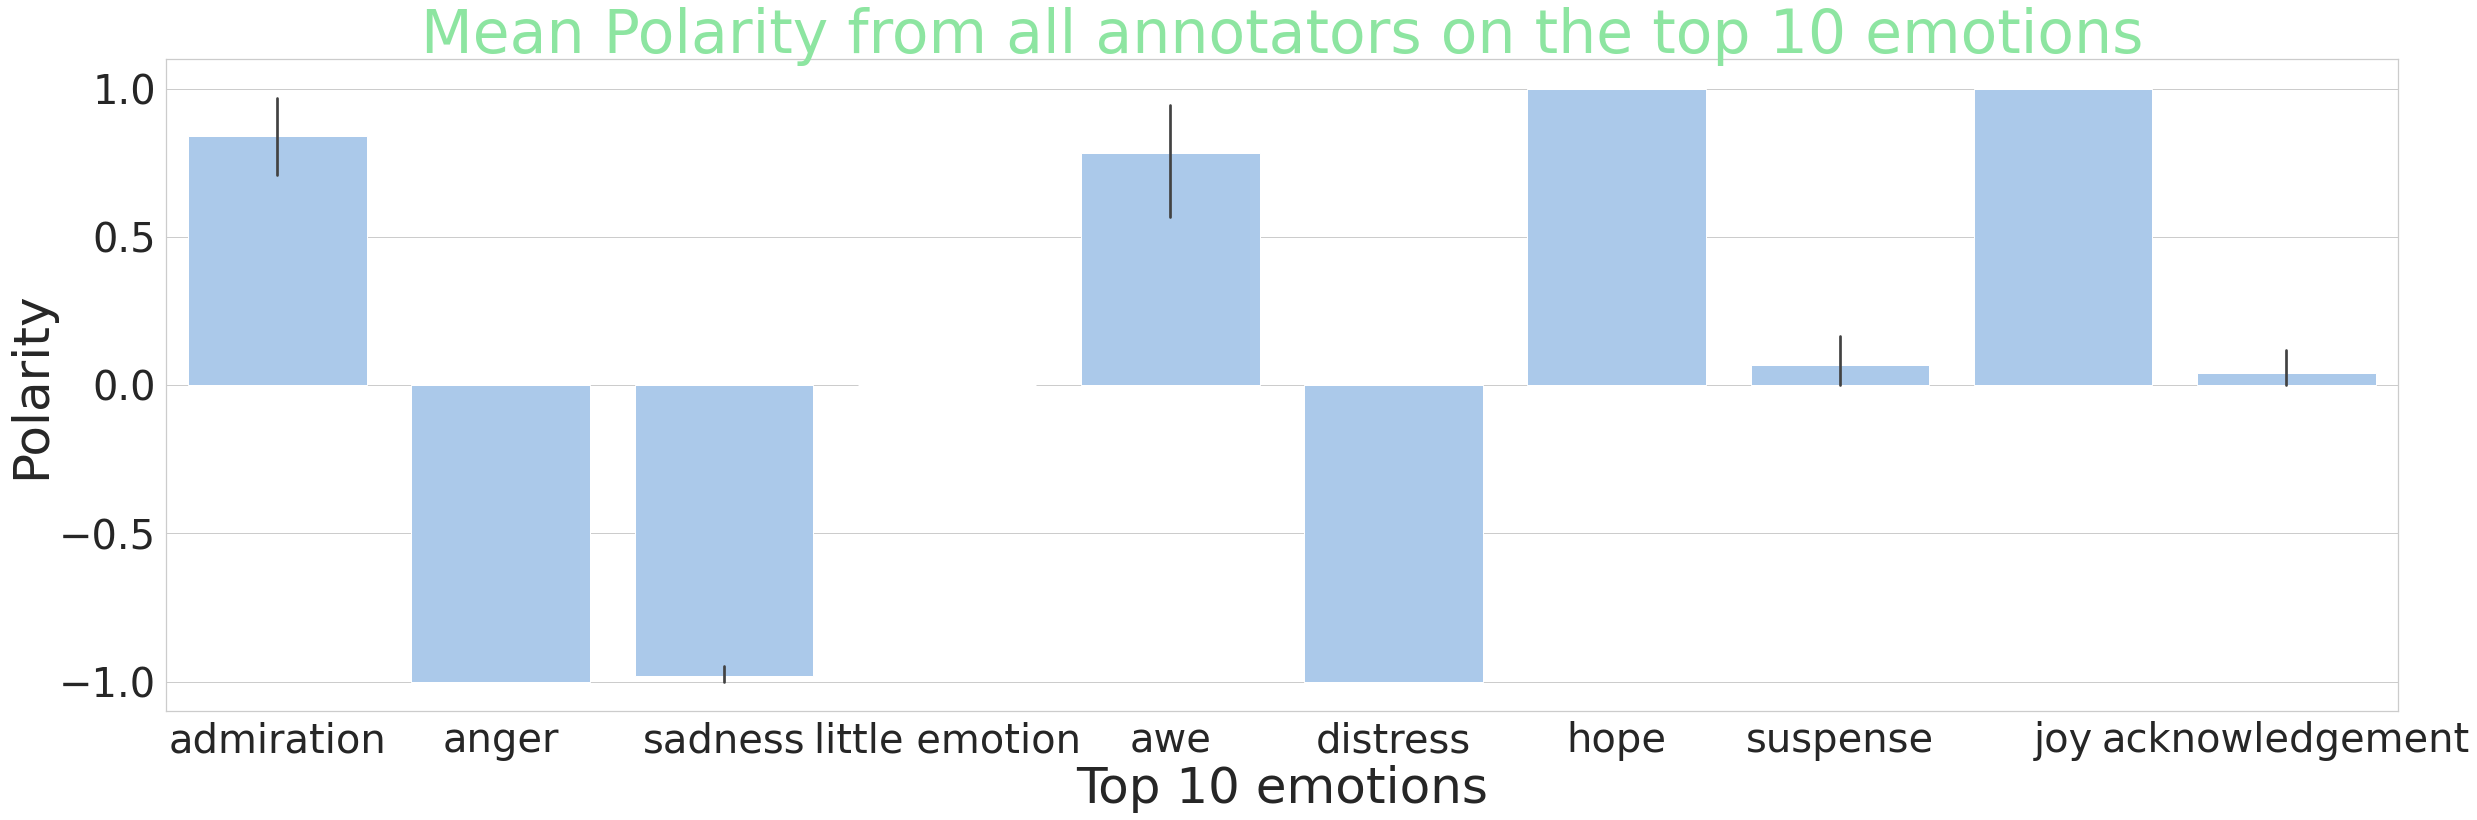

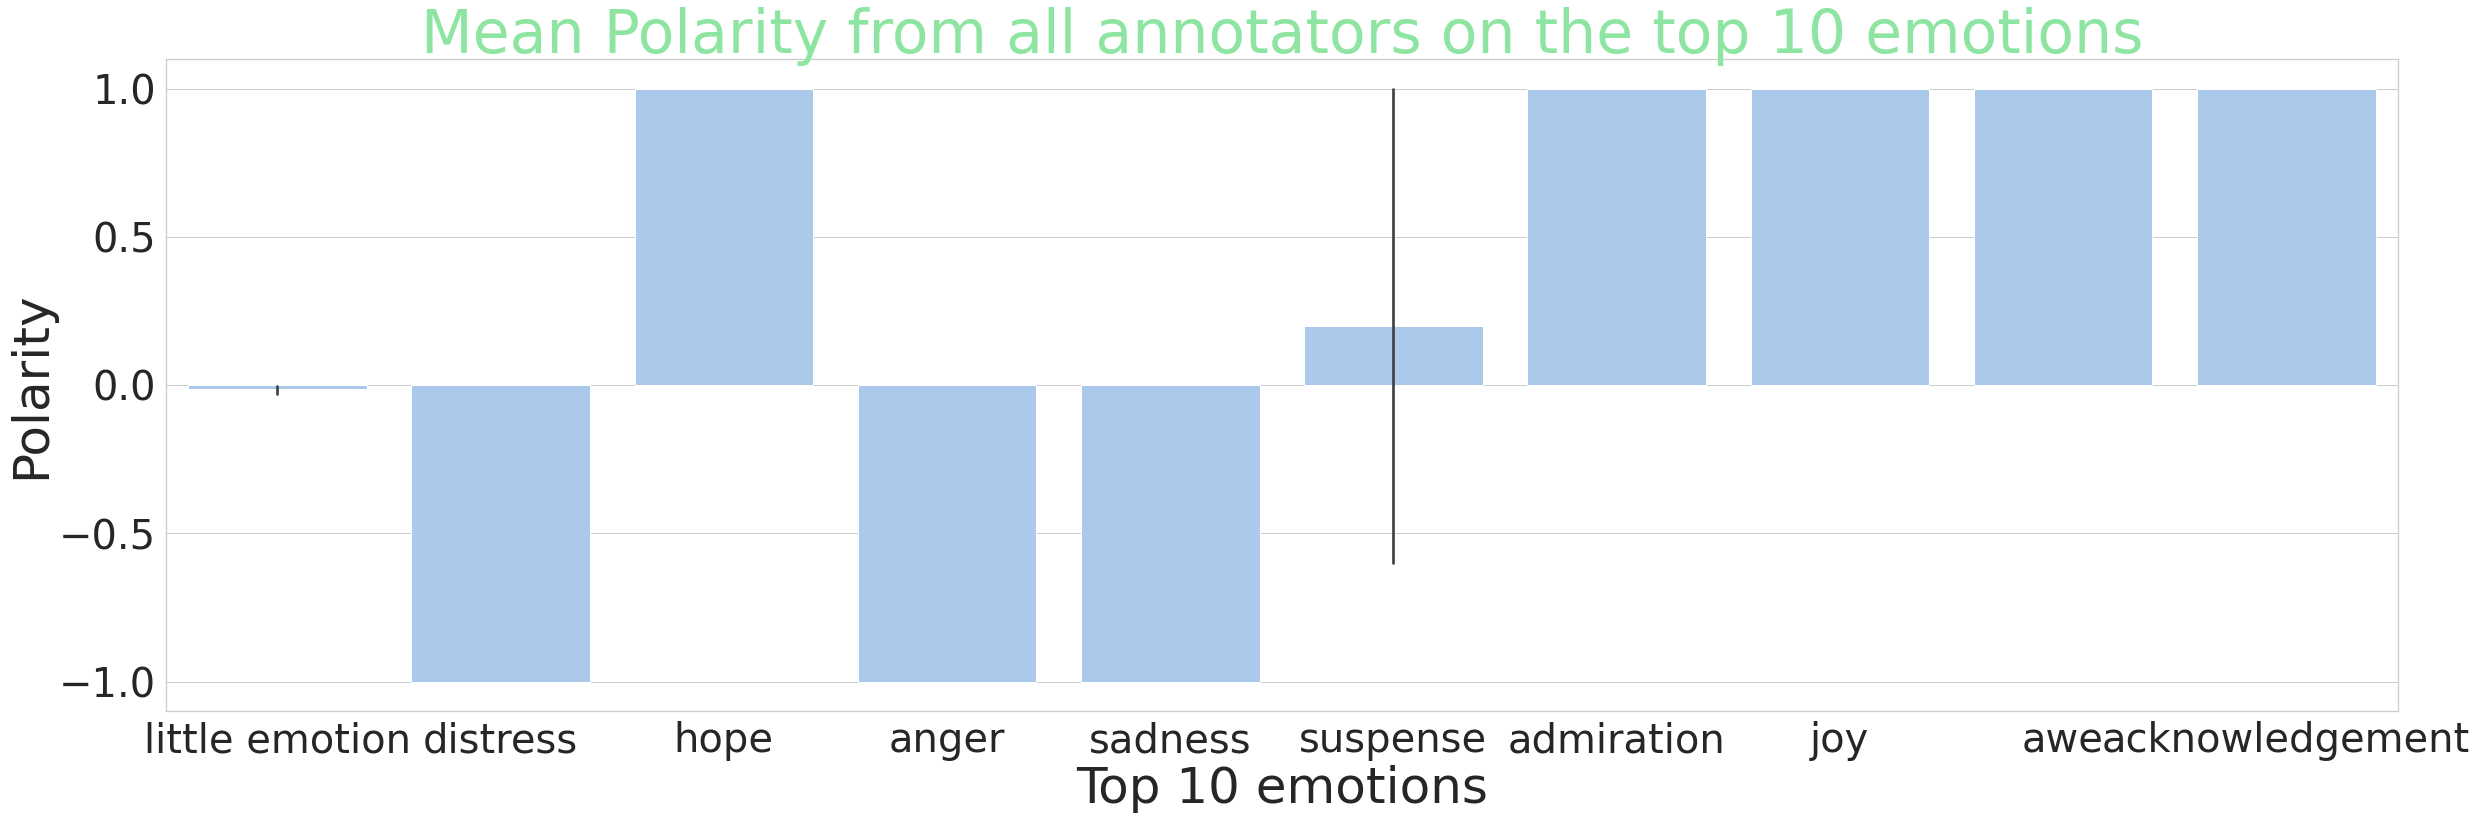

In [124]:

for ID in temp_ID:
    sns.set_theme(style="whitegrid")
    f, ax = plt.subplots(figsize=(40, 12))
    sns.set_color_codes("pastel")
    a=sns.barplot(x="emotions", y="polarity", data=plot_emotions.loc[(ID),:],
            label="Total", color="b")
    a.set_xlabel("Top 10 emotions",fontsize=50)
    a.tick_params(labelsize=40)
    a.axes.set_title("Mean Polarity from all annotators on the top 10 emotions",fontsize=60,c="g")
    a.set_ylabel("Polarity",fontsize=50)
plt.show()


### 3. Automated annotation.
 * Build baselines (at least one based on random guesses) and regressors (at least three sklearn-based) that will yield a score (from -1 to 1) estimating the reader's sentiment for an unseen verse. 
 * Evaluate your models using mean absolute error (MAE) and mean square error (MSE). Turn the gold and predicted scores to classes (-1, 0, 1) and evaluate also using *proper* classification evaluation metrics.  
 * Diagnose and analyse any under/over fitting. 
 * Announce a winner based on your evaluation and apply it in order to predict a label (not score) per verse on the 24th Iliad book that is given. Submit your predictions as a compressed CSV with the following title: `IB24.your-student-ID-number.csv.gz`, where `your-student-ID-number` will hold your student ID number). The submitted dataframe should comprise the verses in one column (exactly as the original), but it should also comprise another column to hold the aligned predictions. 

 ---

In [125]:
# T3    BAG OF WORDS https://machinelearningmastery.com/deep-learning-bag-of-words-model-sentiment-analysis/
import string
import nltk
nltk.download('stopwords')                   #https://www.nltk.org/data.html
from nltk.corpus import stopwords
print(stopwords.fileids())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


I created a very useful method that takes a line and clears it as i found suitable.

In [126]:
def clean_line(line):
    # split into tokens by white space
    tokens = line.split()
    tokens = [w.replace('.', '') for w in tokens]    
    tokens = [w.replace(',', '') for w in tokens]
    tokens = [w.replace('«','') for w in tokens]
    tokens = [w.replace('!','') for w in tokens]
    ##### lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('greek'))
    
    stop_words.add('αυτό')   
    stop_words.add('έτσι')         
    stop_words.add('τους')
    stop_words.add('λόγο')
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

For each verse i cleared and then flattend using the method in the first part.

In [127]:
cleaned_set=[]
for i in range(int(len(coders.iloc[:,0])/10)):
    cleaned_set.append(clean_line(coders.iloc[i,0]))

cleaned_set=flatten(cleaned_set)

In [128]:
len(cleaned_set)

2892

I modified the vocabulary using the counter,to see which words occur a lot and dont have a meaning.Then i went back in my method and modified it to make the dictionary more accurate and important for the polarity choices.

In [129]:
from collections import Counter     #to modify the vocabulary
import numpy as np                  #unique method to make it a set 

vocab = Counter(cleaned_set)
vocab.most_common(50)


cleaned_set=np.unique(cleaned_set)
cleaned_set.tolist()
len(cleaned_set)

1661

I tried stemming for synonms and some similarity functions to make the vocabulary even better,but i didn't have much time so i moved on.

In [130]:
#from nltk.corpus import wordnet as wn      ### for stemming
#wn.synsets('ίσιος', lang='ell')            https://www.nltk.org/howto/wordnet.html   

The baseline and the assumption i made was to find the mean polarity for each verse and train by this to make a quite good estimation of my data.

In [131]:
Y=Balance_plot.groupby(['verse_ID'],sort=False).mean()

In [132]:

Y.to_csv('IB1.f3352115.csv.gz', index=False,
          )

In [133]:
listA=Y.polarity.tolist()

I made another useful method to round the result and classify to labels.I chose 0.33 to give them equal importance (distance)

In [134]:
def Rounding(n):
  temp=[]
  for x in n:
    if x>0.333333333333:
      x=1
    elif x<-0.33333333333 :
      x=-1
    else:
      x=0
    temp.append(x)

  return np.array(temp)

In [135]:
to_clean=pd.read_excel(file).verse

Each verse cleaned is clean variable and cleaned_set is the vocabulary.


In [136]:
clean=[]
for w in to_clean:
    clean.append(clean_line(w))

I used those lists to vectorize them inspired by one hot in eclass.But instead of characters ,each word is 1 if exist and 0 if it doesnt.

In [137]:
big_list=[]

for w in clean:
    
    list_check=[]
    
    for w1 in cleaned_set:
    
        if w1 in w:
        
        
            list_check.append(1)
        
        else:    
    
            list_check.append(0)
        
        
    big_list.append(list_check)    
    
    
    

Make the X and Y dataframes to apply on regressors.

In [138]:
new_X=pd.DataFrame(data=big_list) 

In [139]:
new_Y=pd.DataFrame(data=Rounding(Y.polarity.astype("float"))) 

Used train test split function.

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(new_X, new_Y, test_size=0.3, random_state=42)

In [141]:
y_train.shape

(412, 1)

In [142]:
X_train.shape

(412, 1661)

First regressor takes no params it is Linear.

In [143]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train,y_train)
predictions=reg.predict(X_test)
final_pred=Rounding(predictions)

In [144]:
 from sklearn.metrics import confusion_matrix

 confusion_matrix(y_test,final_pred)


array([[12, 27,  4],
       [15, 75, 11],
       [ 2, 28,  3]])

The diagonal has been most accurate in zero's.

In [145]:
from sklearn.metrics import f1_score

f1_score(y_test,final_pred,average=None)

array([0.33333333, 0.64935065, 0.11764706])

0.6 with a good balance on precision-recall.

In [146]:
from sklearn.metrics import accuracy_score

#### true number

accuracy_score(y_test,final_pred)

0.5084745762711864

Accuracy 50% not bad not good.

In [147]:
from sklearn.metrics import mean_squared_error


mean_squared_error(y_test,final_pred)

0.5932203389830508

In [148]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, final_pred)

0.5254237288135594

The errors are normal.

2nd regressor MLP works better on NLP as i observed online.I tried many params but it didnt have much impact.

In [149]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
#,early_stopping=True,tol=1e-6,n_iter_no_change=12,validation_fraction=0.2

regr_mlp = MLPRegressor(random_state=10, max_iter=1000).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [150]:
predictions_mlp=regr_mlp.predict(X_test)
final_pred_mlp=Rounding(predictions_mlp)

In [151]:
 confusion_matrix(y_test,final_pred_mlp)

array([[ 8, 33,  2],
       [13, 82,  6],
       [ 2, 29,  2]])

Not quite good prediction for -1

In [152]:
f1_score(y_test,final_pred_mlp,average=None)

array([0.24242424, 0.66938776, 0.09302326])

Imballanced macro micro but good accuracy

In [153]:
accuracy_score(y_test,final_pred_mlp)

0.519774011299435

Next i tried feature selection,but i think it takes a peak on the data before the regression and thats why i dont present it officially.

In [154]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
###     k best features 


XX= SelectKBest(k=500).fit_transform(new_X,new_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
XX.shape

(589, 500)

Select K best features ,to achieve better results  

In [156]:
new_XX=pd.DataFrame(data=XX)

In [157]:
new_XX_train, new_XX_test, new_yX_train, new_yX_test =train_test_split(new_XX, new_Y, test_size=0.2, random_state=62)

In [158]:
reg2 = LinearRegression().fit(new_XX_train,new_yX_train)
predictionsX=reg2.predict(new_XX_test)
final_predX=Rounding(predictionsX)

In [159]:
accuracy_score(new_yX_test,final_predX)

0.7033898305084746

0.7 accuracy 

In [160]:
f1_score(new_yX_test,final_predX,average=None)

array([0.42105263, 0.85135135, 0.51612903])

excellent f1 ~0.8

Random forest regressor ,with max depth=200

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr3 = RandomForestRegressor(max_depth=200, random_state=40)
regr3.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(max_depth=200, random_state=40)

In [162]:
RF_pred=regr3.predict(X_test)
final_RF=Rounding(RF_pred)

In [163]:
accuracy_score(y_test,final_RF)

0.5423728813559322

The best accuracy so far 0.54

In [164]:
f1_score(y_test,final_RF,average=None)

array([0.19047619, 0.69803922, 0.05555556])

But big imbalance in f1 score.

In [165]:
mean_squared_error(y_test,final_RF)

0.5254237288135594

To check the overfitting i kept changing the train test split parameter and observed that the model overfits,because our model does much better on the training set than on the test set.It was 98% accuracy on training set and a little more than 50% accuracy on the test set.I tried to prevent it as i could but i had to move on to finish the assignment.

Overall the best regressor was mlp , good accuracy combined with a balanced f1 score (precision~recall) and error as low as possible.

Next we load the 24th illiad


In [166]:
Illiad=pd.DataFrame({'A' : []})

In [167]:
Illiad=pd.read_excel("I24.xlsx")

Clean and vectorise as before.

In [168]:
Illiad_clean=[]
for w in Illiad.verse:
    Illiad_clean.append(clean_line(w))

In [169]:
len(Illiad_clean)

830

In [170]:
big_list_I=[]

for w in Illiad_clean:
    
    list_check=[]
    
    for w1 in cleaned_set:
    
        if w1 in w:
        
        
            list_check.append(1)
        
        else:    
    
            list_check.append(0)
        
        
    big_list_I.append(list_check)    

In [171]:
I_X=pd.DataFrame(data=big_list_I)

In [172]:
I_X.shape

(830, 1661)

In [173]:
predictions_I=regr_mlp.predict(I_X)
final_pred_I=Rounding(predictions_I)

In [174]:
Illiad['polarity'] = final_pred_I

Check destribution of polarities after the prediction with my best regressor MLP.

In [175]:
Illiad["polarity"].value_counts()

 0    673
-1    118
 1     39
Name: polarity, dtype: int64

Save to csv in google collab

In [176]:
Illiad.to_csv('IB24.f3352115.csv.gz', index=False,
          )


### 4. Scraping and silver labeling.
 * Scrape all the books of Iliad, by using this [translation from Project Gutenberg](https://www.gutenberg.org/cache/epub/36248/pg36248-images.html).
 * Use your best performing sentiment classifier from (3) to label the verses of all the 24 crawled books (silver labeling).  
 * Visualise the sentiment series resulted from the silver labels of all the books. 
 * Evaluate your model's predictions for the 1st scraped book with the respective gold annotations (of the same book from T3, yet with a different translation), which you used to train your model.

In [177]:
# T4

!pip3 install requests
import requests
import pprint
!pip install beautifulsoup4 requests
from bs4 import BeautifulSoup

Connect to the html

In [178]:

r = requests.get("https://www.gutenberg.org/cache/epub/36248/pg36248-images.html")

In [179]:
html = r.content
soup = BeautifulSoup(html, 'html.parser')

Create an empty list of lists of 24 positions each position will be used for a rapsody.

In [180]:
# Create an empty list                  reference: https://thispointer.com/how-to-create-and-initialize-a-list-of-lists-in-python/
list_of_lists = []
# Iterate over a sequence of numbers from 0 to 4
for i in range(24):
    # In each iteration, add an empty list to the main list
    list_of_lists.append([])
print('List of lists:')
print(list_of_lists)

List of lists:
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


I searched td tags directly.Then for each object i found if it contains sparse,so the rapsodie changed.If it contains i append it on the next rapsodie.If it doent i keep appending on the current rapsodie.The flag was used to for the intialization process.The i index controls which rapsodie i append to.

In [181]:
verse_list = soup.find_all("td")  #every verse the <td> tags

flag=False
i=0
for verses in verse_list:   

  change=verses.find("span")  #find if rapsodie changes 

  if (change is not None) and (flag) :  #if the rapsodie changes so span has One letter
    i=i+1
    print("changes rapsodie: ",i)

  if  i==0 and flag==False:  #if the rapsodie changes so span has One letter
      list_of_lists[0].append(verses.get_text())
      flag=True

  if verses.get_text not in ['.','']:  
    list_of_lists[i].append(verses.get_text())

  #for rapsodie in list_of_lists:

changes rapsodie:  1
changes rapsodie:  2
changes rapsodie:  3
changes rapsodie:  4
changes rapsodie:  5
changes rapsodie:  6
changes rapsodie:  7
changes rapsodie:  8
changes rapsodie:  9
changes rapsodie:  10
changes rapsodie:  11
changes rapsodie:  12
changes rapsodie:  13
changes rapsodie:  14
changes rapsodie:  15
changes rapsodie:  16
changes rapsodie:  17
changes rapsodie:  18
changes rapsodie:  19
changes rapsodie:  20
changes rapsodie:  21
changes rapsodie:  22
changes rapsodie:  23


In [182]:

for i in range(24):
  print('each rapsodie contains uncleard: ',len(list_of_lists[i]))

each rapsodie contains uncleard:  1443
each rapsodie contains uncleard:  1106
each rapsodie contains uncleard:  1066
each rapsodie contains uncleard:  1220
each rapsodie contains uncleard:  2110
each rapsodie contains uncleard:  1218
each rapsodie contains uncleard:  1088
each rapsodie contains uncleard:  1098
each rapsodie contains uncleard:  1462
each rapsodie contains uncleard:  1324
each rapsodie contains uncleard:  1792
each rapsodie contains uncleard:  818
each rapsodie contains uncleard:  10
each rapsodie contains uncleard:  1114
each rapsodie contains uncleard:  1254
each rapsodie contains uncleard:  1234
each rapsodie contains uncleard:  946
each rapsodie contains uncleard:  1170
each rapsodie contains uncleard:  934
each rapsodie contains uncleard:  458
each rapsodie contains uncleard:  630
each rapsodie contains uncleard:  1012
each rapsodie contains uncleard:  1736
each rapsodie contains uncleard:  1736


Now i will combine each rapsodie of list of list into a dataframe as All_Raps

In [183]:
All_Raps=pd.DataFrame(data=flatten(list_of_lists))    ### initialize dataframe
All_Raps.columns=['a']


I made a method Rapsodie_TestSet to transform a dataframe of a rapsodie or all the rapsodies,cleaned vectorized and return it as dataframe and ready for prediction.It has almost the same code as in T3 with some modifications on null lines or lines with comma and excluded them.

In [184]:
# T4

def Rapsodie_TestSet(df):

  #remove lines with dots or nothing
  Removed=[]
  for w in df.a:
    if w!="" and w!="." and w!=[]:
      Removed.append(w)


  Raps_clean=[]
  for w in Removed:
    Raps_clean.append(clean_line(w))


  big_list=[]

  for w in Raps_clean:

      list_check=[]
    
      for w1 in cleaned_set:
    
          if w1 in w:
        
        
              list_check.append(1)
        
          else:    
            
              list_check.append(0)
        
        
      big_list.append(list_check)    
    
    
  Raps_X=pd.DataFrame(data=big_list) 
  return(Raps_X)

Now its time to predict the labels for all the rapsodies combined.So firstly i combine them.This will take a little more time ,clean and vectorize each verse from all rapsodies.

In [185]:
Raps_X=Rapsodie_TestSet(All_Raps)   

Then predict them:

In [186]:
pred_RapAll=regr_mlp.predict(Raps_X)
final_RapAll=Rounding(pred_RapAll)

In [187]:
final_RapAll =pd.DataFrame(data=final_RapAll)

In [188]:
final_RapAll.value_counts()

 0    14134
-1      957
 1      395
dtype: int64

In [189]:
final_RapAll.to_csv('iliad_from_gutenberg.f3352115.csv.gz', index=False,
          )


Lets predict each rapsodie,we use the same method but iterate the list of lists insted of combining them.Also visualise the difference with the help of boxplots.

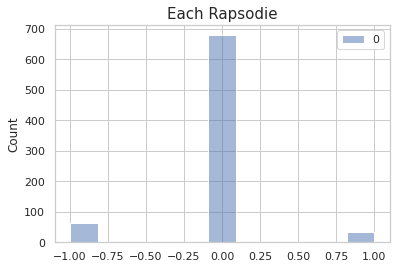

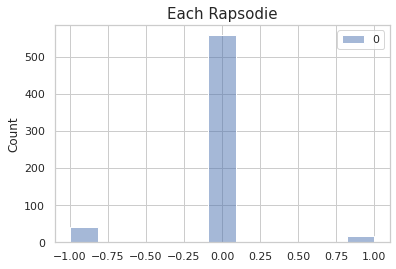

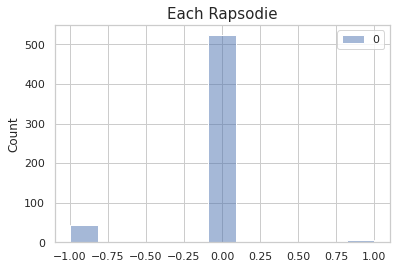

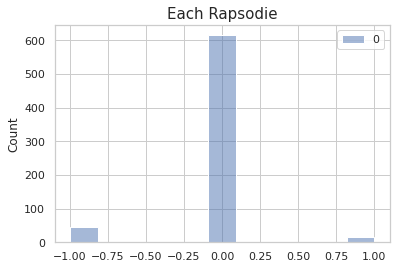

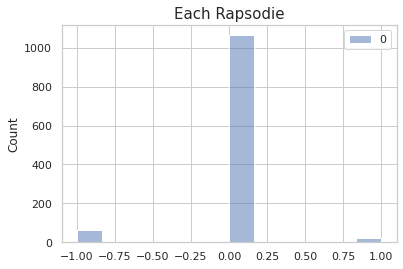

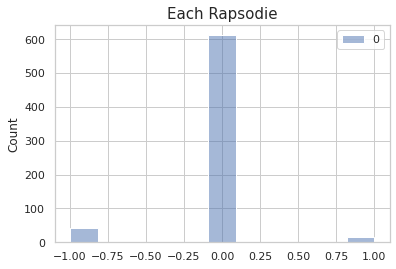

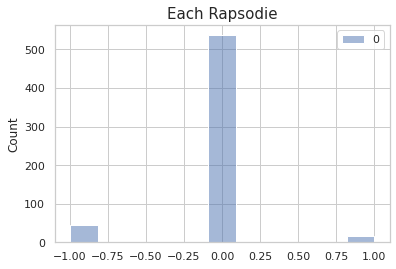

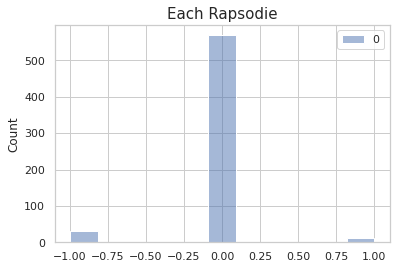

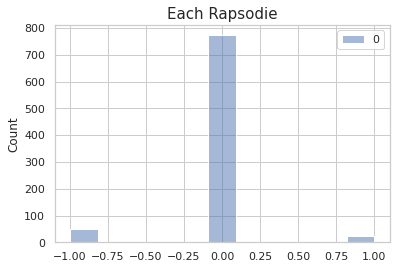

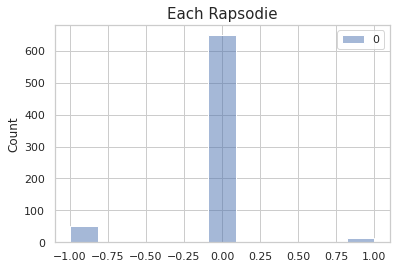

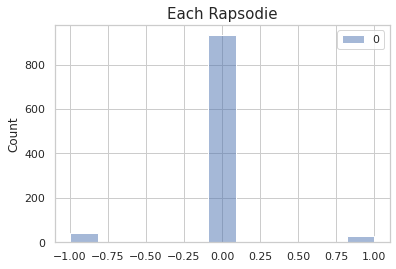

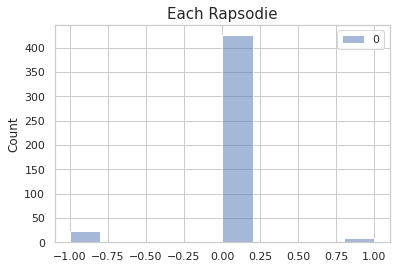

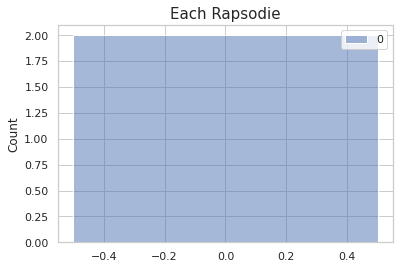

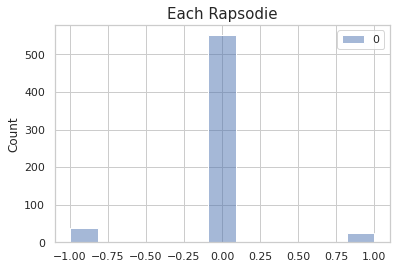

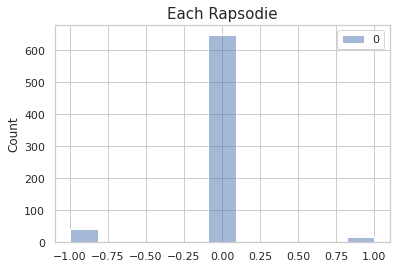

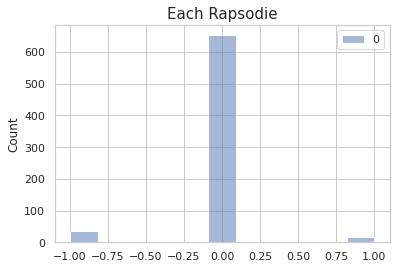

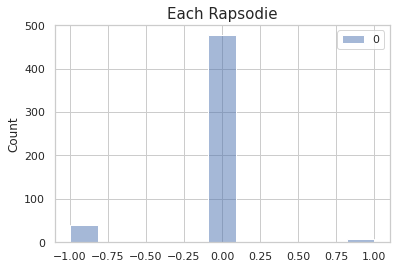

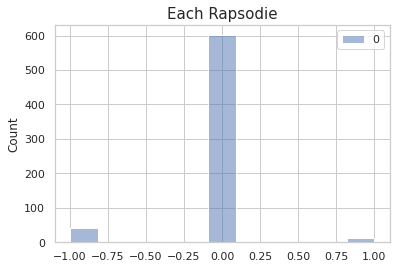

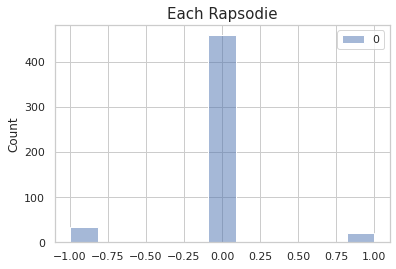

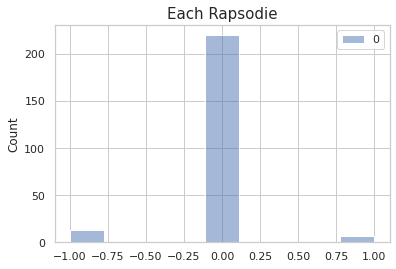

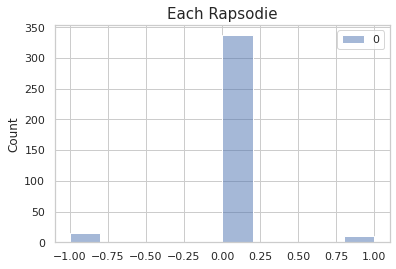

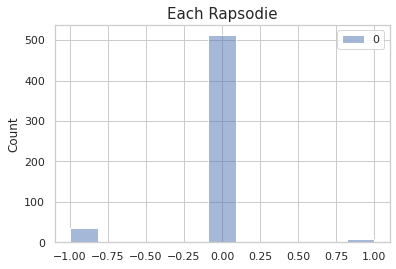

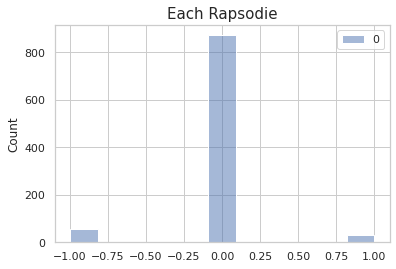

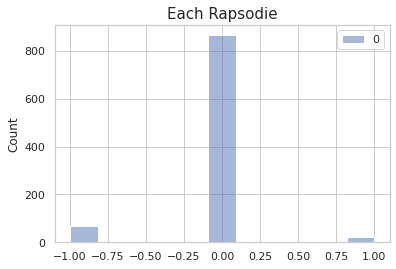

In [190]:
rap_num=0
fig, ax =plt.subplots(1,1)
for item in list_of_lists:

  
  item=pd.DataFrame(data=item)    ### initialize each dataframe
  item.columns=['a']
  item_X=Rapsodie_TestSet(item)   
  pred_item=regr_mlp.predict(item_X)
  final_item=Rounding(pred_item)
  final_item =pd.DataFrame(data=final_item)
  #print("Rapsodie: ",rap_num," has: \n ",final_item.value_counts())     run to see exactly how many 
  rap_num+=1

  
  b=sns.histplot(data=final_item,label="Total",
             color="r")
  b.axes.set_title("Each Rapsodie",fontsize=15)
  plt.show()
  


We see that polarity -1,1 doesnt exceed 100 times,so we could say that the predictions aren't so good,because Illiad creates a lot of emotion.

We are intrested especially in rapsodie A so i will save the cleaned and vectorized set: 

In [191]:
temp=pd.DataFrame(data=list_of_lists[0])
temp.columns=['a']
Raps_A=Rapsodie_TestSet(temp) 

pred_RapA=regr_mlp.predict(Raps_A)
final_RapA=Rounding(pred_RapA)
final_RapA =pd.DataFrame(data=final_RapA)
final_RapA.value_counts()

 0    679
-1     62
 1     34
dtype: int64

Now for the gold truth: 

In [192]:
new_Y.columns=['a']

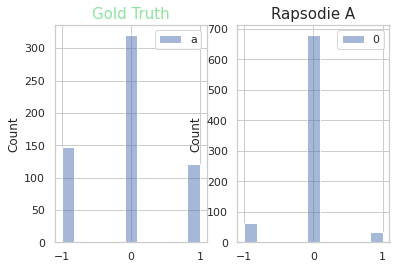

In [193]:
fig, ax =plt.subplots(1,2)
a=sns.histplot(data=new_Y,label="Total",
             color="b", ax=ax[0])
a.axes.set_title("Gold Truth",fontsize=15,c="g")
b=sns.histplot(data=final_RapA,label="Total",
             color="r", ax=ax[1])
b.axes.set_title("Rapsodie A",fontsize=15)
fig.show()

We observe the Rapsodie A prediections have a lot of zeros.That occurs due to the vocabulary difference of the two translations and the noise of the dataset.

###  BONUS:  

Try to improve your best performing model, in order to better generalise. Your labels of the 24th will be compared against those of a quality annotator to evaluate your model. The top five scores will receive a bonus of 10%. 

---

In [194]:
# Bonus coding...


### Submission: 
* A zipped folder (only ZIP, not RAR), with your student ID number as name (e.g., f12345.zip), which will include the following files: 
  * The notebook with the tasks and the solutions, named as: `your-student-ID-number.ipynb`.
  * The dataframe with the ground truth annotations from the second task (T2) named as: `IB1.your-student-ID-number.csv.gz`
  * The predictions for the 24th book (from T3), named as: `IB24.your-student-ID-number.csv.gz`
  * The dataframe with the silver annotations of all the scrapped books (from T4), using a long format and named as: `iliad_from_gutenberg.your-student-ID-number.csv.gz`

### Evaluation criteria: 
  * The four tasks are equally weighted in terms of grades (25% each). 
  * With this assignment you are expected to do data preprocessing, exploratory analysis, train and evaluate machine learning models, employ (scraping and) visualisation as an analysis tool. 
  * The code cells that solve a task should follow the cell with the respective task description. Any textual analysis/description should exist in **text** cells (not in the source code) following the code cells that solve the related task. Use Jupyter's markdown-cell option to add text cells. 
  * If you borrow a solution that exists online, name the link you took it from and what you did to adapt it to your task. Detected plagiarism (esp. copying from a source without quoting and duplicate code between students) will lead to a zero grade.
  * Your code should be well-structured and comments should explain as much as possible, to avoid misunderstandings during evaluation (points might be lost due to this).
  * Everyone will be assessed by their written notebook, but if there are questions, some may be asked to explain in brief orally.

---